In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew

In [56]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')
client_df.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


## Some insights from data

In [57]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [58]:
client_df['num_years_antig'].unique()

array([ 3,  6,  4,  5,  7, 11, 12,  8,  9, 10,  2, 13,  1], dtype=int64)

In [59]:
client_df['nb_prod_act'].unique()

array([ 2,  1,  3,  4,  5,  9,  6,  8, 32, 10], dtype=int64)

In [60]:
client_df['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

### Data description
- id = client company identifier
- cons_12m = electricity consumption of the past 12 months
- cons_gas_12m = gas consumption of the past 12 months
- cons_last_month = electricity consumption of the last month
- date_activ = date of activation of the contract
- date_end = registered date of the end of the contract
- date_modif_prod = date of the last modification of the product
- date_renewal = date of the next contract renewal
- forecast_cons_12m = forecasted electricity consumption for next 12 months
- forecast_cons_year = forecasted electricity consumption for the next calendar year
- forecast_discount_energy = forecasted value of current discount
- forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
- forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
- forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
- forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
- has_gas = indicated if client is also a gas client
- imp_cons = current paid consumption
- margin_gross_pow_ele = gross margin on power subscription
- margin_net_pow_ele = net margin on power subscription
- nb_prod_act = number of active products and services
- net_margin = total net margin
- num_years_antig = antiquity of the client (in number of years)
- pow_max = subscribed power
- churn = has the client churned over the next 3 months

### price data description
- id = client company identifier
- price_date = reference date
- price_off_peak_var = price of energy for the 1st period (off peak)
- price_peak_var = price of energy for the 2nd period (peak)
- price_mid_peak_var = price of energy for the 3rd period (mid peak)
- price_off_peak_fix = price of power for the 1st period (off peak)
- price_peak_fix = price of power for the 2nd period (peak)
- price_mid_peak_fix = price of power for the 3rd period (mid peak)


In [61]:
# dropping unnecessary columns
client_df.drop(['channel_sales','origin_up'], axis = 1, inplace = True)

In [62]:
# converting to datatime data
dates = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for i in dates:
    client_df[i] = pd.to_datetime(client_df[i])

In [63]:
gas_status={'t' :1, 'f':0}
client_df['gas_status'] = client_df['has_gas'].map(gas_status)

In [64]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   cons_12m                        14606 non-null  int64         
 2   cons_gas_12m                    14606 non-null  int64         
 3   cons_last_month                 14606 non-null  int64         
 4   date_activ                      14606 non-null  datetime64[ns]
 5   date_end                        14606 non-null  datetime64[ns]
 6   date_modif_prod                 14606 non-null  datetime64[ns]
 7   date_renewal                    14606 non-null  datetime64[ns]
 8   forecast_cons_12m               14606 non-null  float64       
 9   forecast_cons_year              14606 non-null  int64         
 10  forecast_discount_energy        14606 non-null  float64       
 11  fo

In [65]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,gas_status
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152,0.181501
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175,0.385446


In [66]:
x= client_df.drop('id', axis = 1)


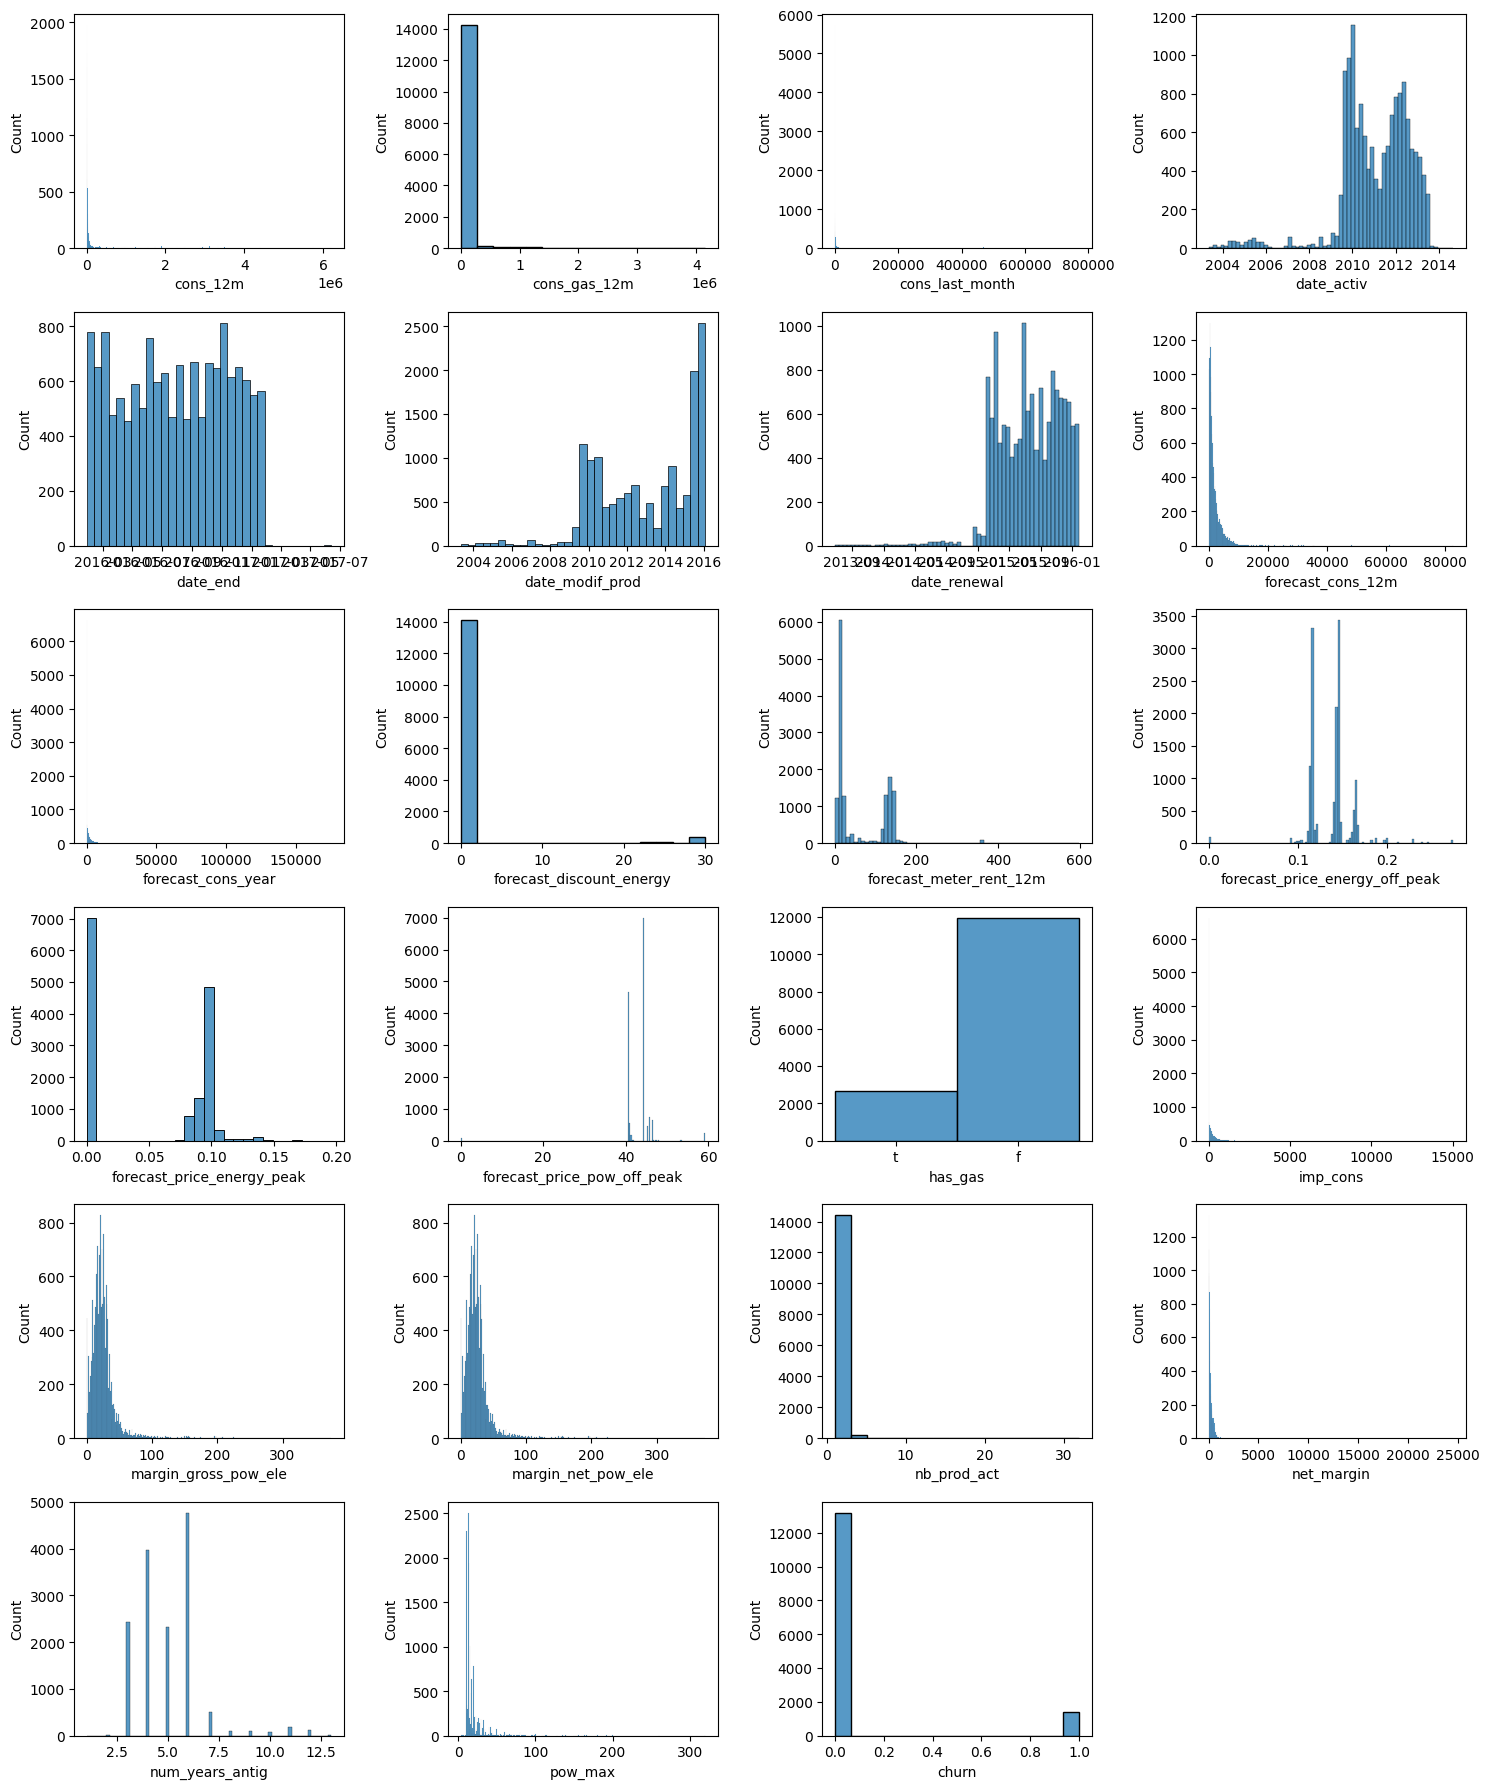

In [67]:
fig = plt.figure(figsize=(15,18))
for i in range(23):
    plt.subplot(6,4,i+1)
    sns.histplot(x.iloc[:,i])
plt.tight_layout()
plt.show()

# Churn Status

In [68]:
num_df = client_df.drop(['id','date_activ', 'date_end', 'date_modif_prod', 'date_renewal','has_gas'],axis = 1) #numerical data

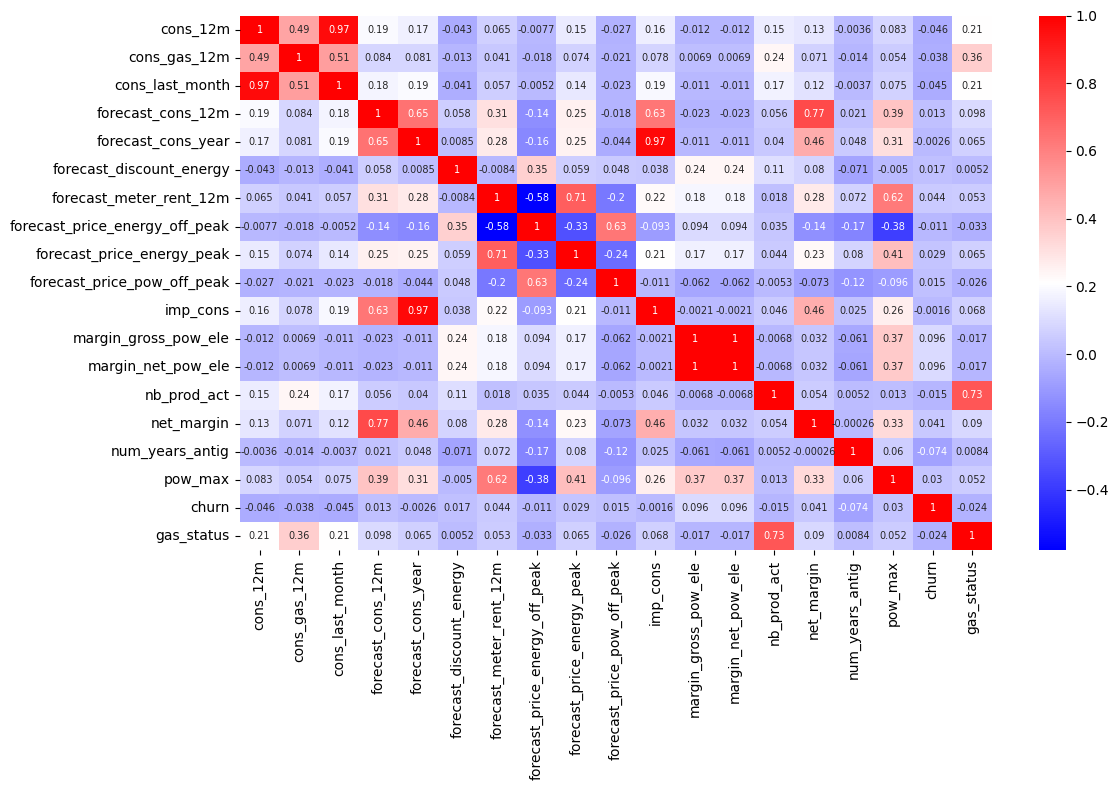

In [69]:
plt.figure(figsize=(12, 8))
sns.heatmap(num_df.corr(),cmap='bwr',annot=True,annot_kws = {'size' : 7})
plt.tight_layout()

### obsetvations
- Negative correlation with num_years_antig (~ -0.074),
 takeaway: Customers who have been with the company longer are less likely to churn. so newer customers should be targeted for retention efforts.
- negative correlation with pow_max (~ -0.033)
 takeaway: Large consumers have long-term contracts so less likely to churn. target the smaller consumers
- negative correlation with gas status( - o.024) - consumers with gas services are less likely to churn


## observing churn variable first

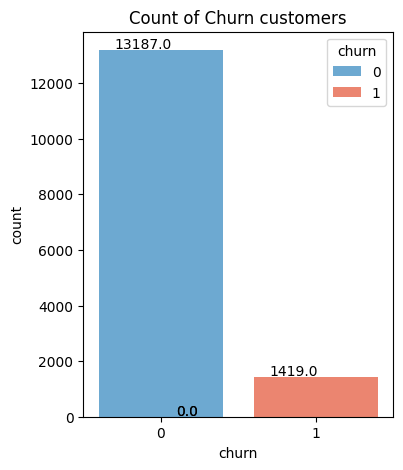

In [70]:
plt.figure(figsize=(4,5))
ax = sns.countplot(data = client_df, x= 'churn',palette=['#3498DB','#FF5733'],hue = 'churn',alpha = 0.8)
plt.xlabel('churn')
plt.ylabel('count')
plt.title('Count of Churn customers')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Now lets see how consumption relates to churning status


In [71]:
def plot_distribution(dataframe, column, ax, bins=50 ):
    # create a temporary dataframe for churn and retention
    temp = pd.DataFrame({'Retention':dataframe[dataframe['churn']==0][column],
                         "churn":dataframe[dataframe['churn']==1][column]}) # group the column's data into 2 groups and put them into stacked plot 
    temp[['Retention','churn']].plot(kind = 'hist',bins = bins,ax = ax, stacked= True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')


In [72]:
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]


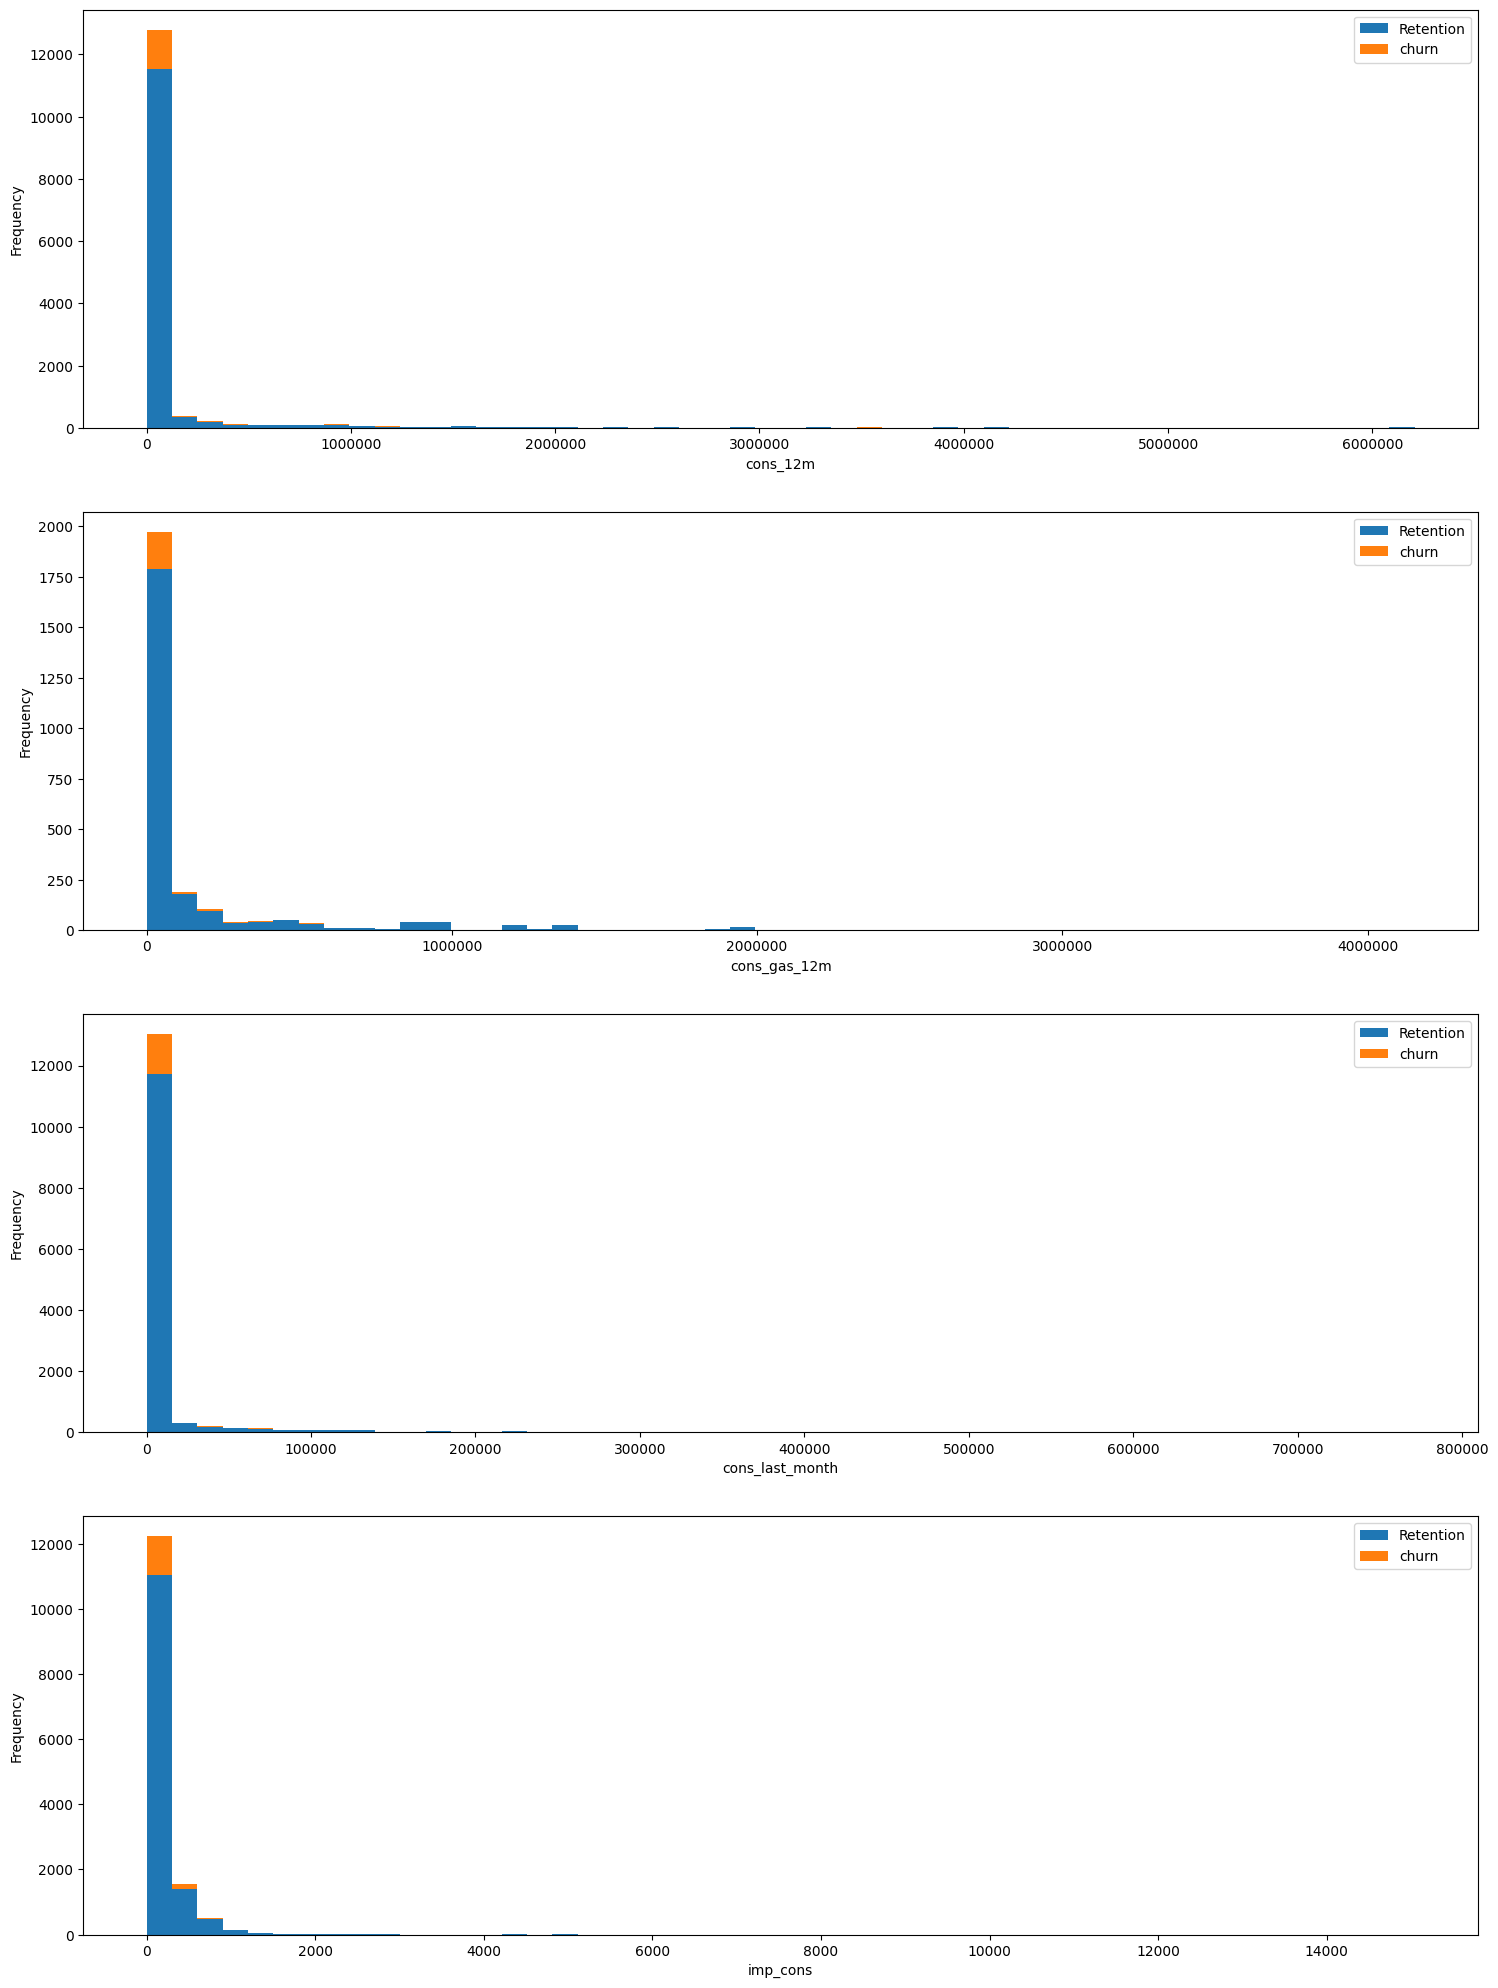

In [73]:
fig, ax = plt.subplots(4,figsize =(18,25))
plot_distribution(consumption,'cons_12m',ax[0])
plot_distribution(consumption[consumption['has_gas']=='t'],'cons_gas_12m',ax[1])
plot_distribution(consumption,'cons_last_month',ax[2])
plot_distribution(consumption,'imp_cons',ax[3])

As the data is highly right skewed, we apply log(1+x) transformation to get better patterns.

In [74]:
consumption = client_df[['cons_12m', 'cons_gas_12m', 'cons_last_month','imp_cons','has_gas', 'churn']].copy()
for column in ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']:
    consumption[column] = pd.to_numeric(consumption[column], errors='coerce')  # Convert to float, set errors to NaN

# Apply log transformation
for column in ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']:
    consumption[column] = np.log1p(consumption[column])  # log(1 + x)



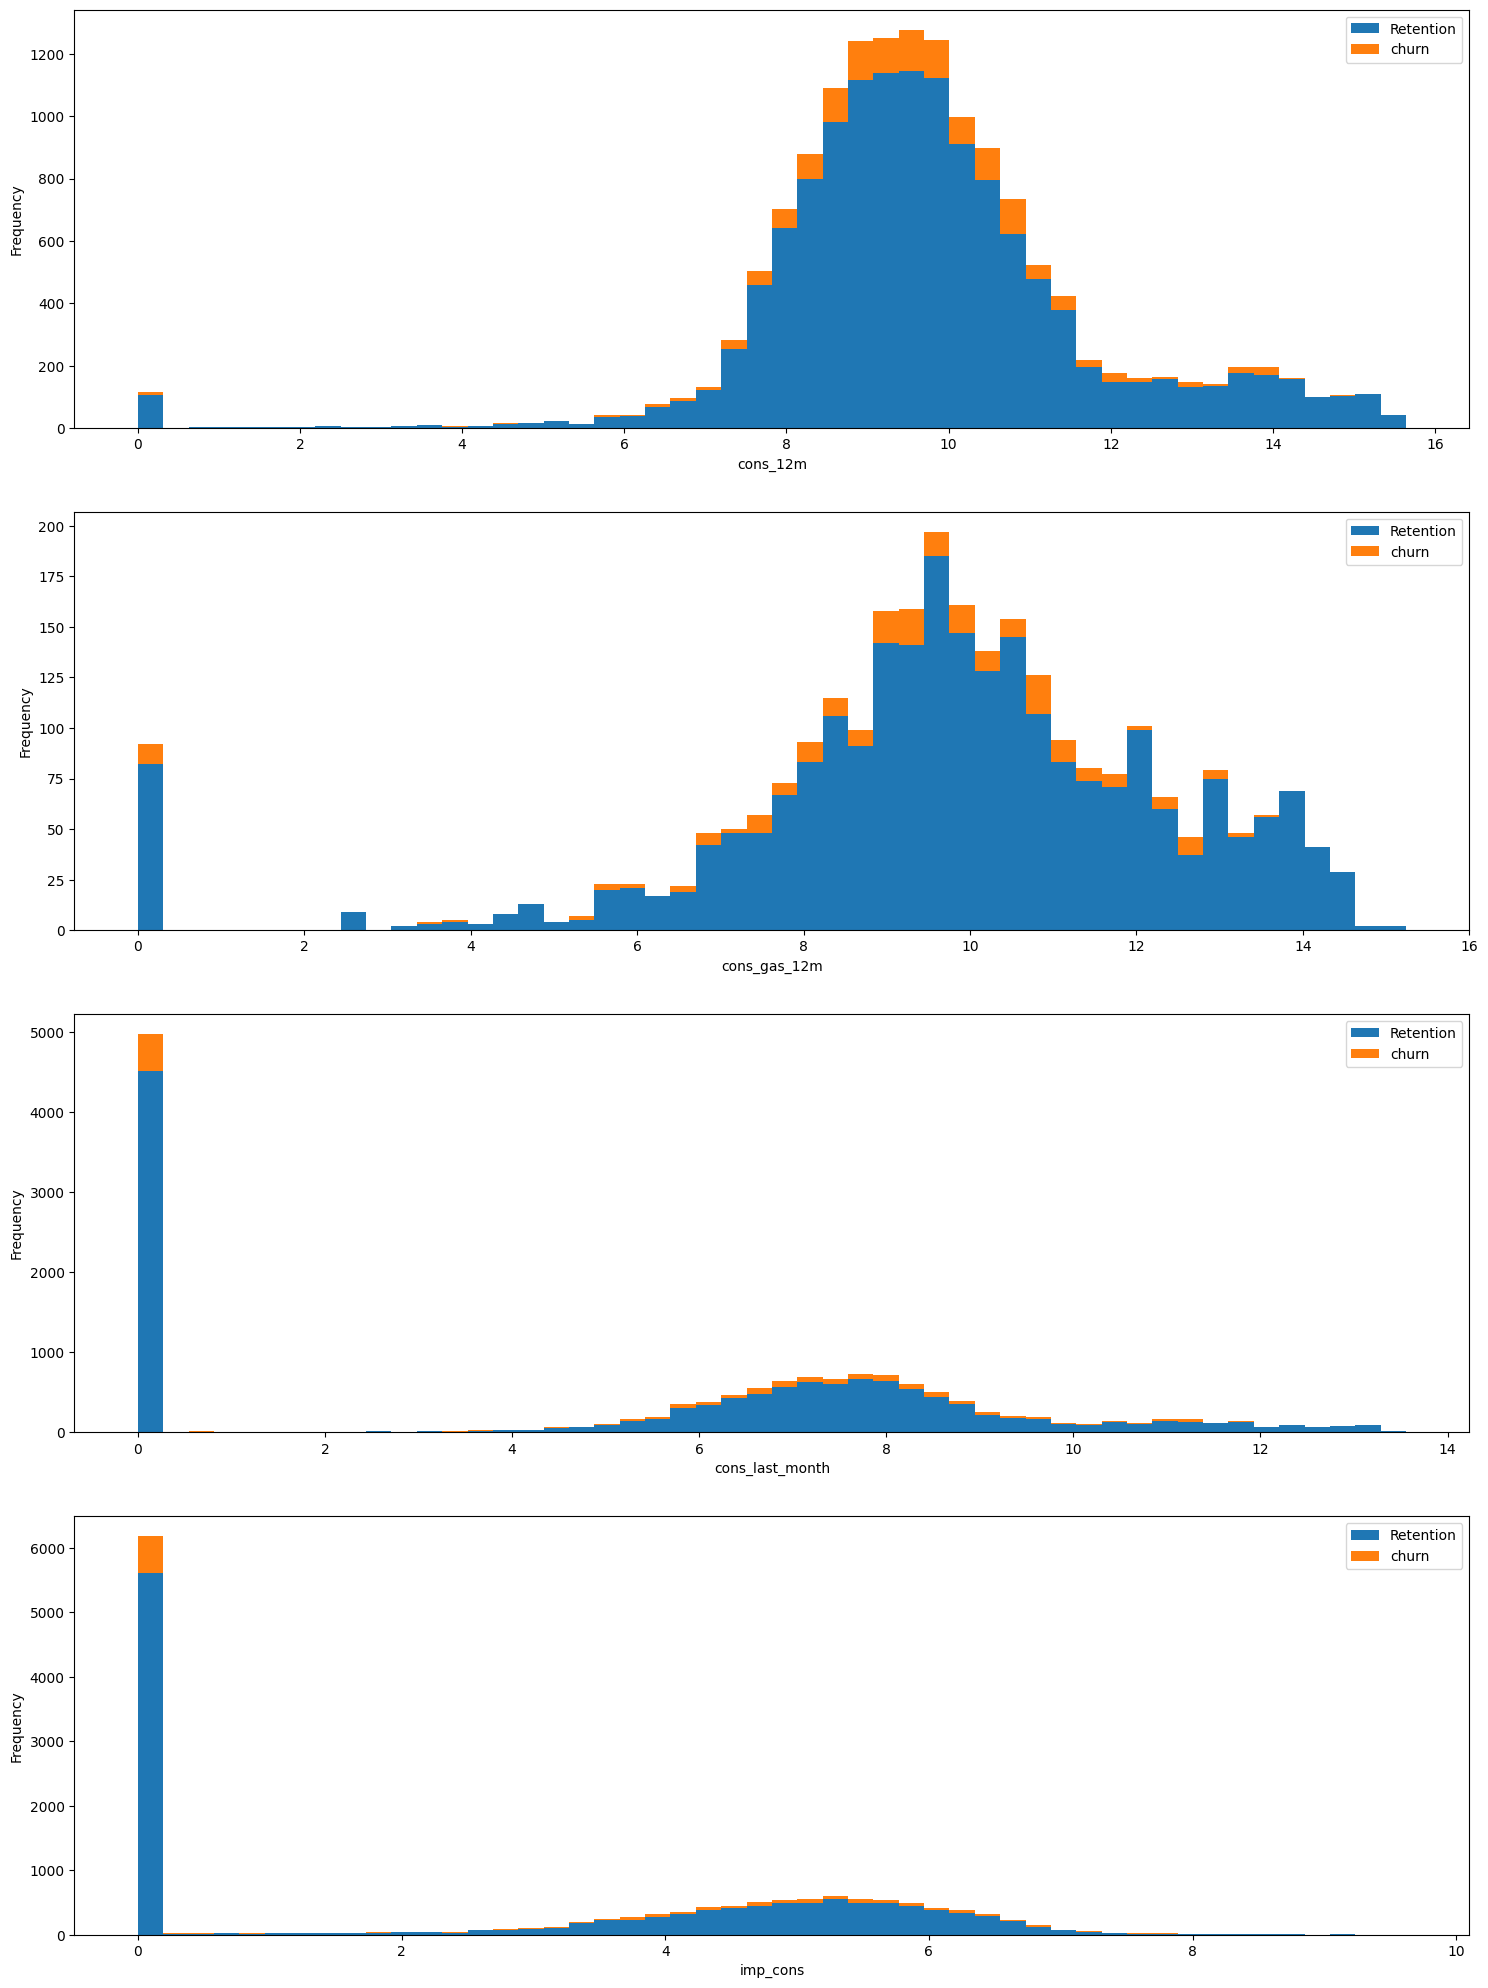

In [75]:
fig, ax = plt.subplots(4,figsize =(18,25))
plot_distribution(consumption,'cons_12m',ax[0])
plot_distribution(consumption[consumption['has_gas']=='t'],'cons_gas_12m',ax[1])
plot_distribution(consumption,'cons_last_month',ax[2])
plot_distribution(consumption,'imp_cons',ax[3])

In [76]:
X= client_df.drop('id', axis = 1)
y= client_df['id']

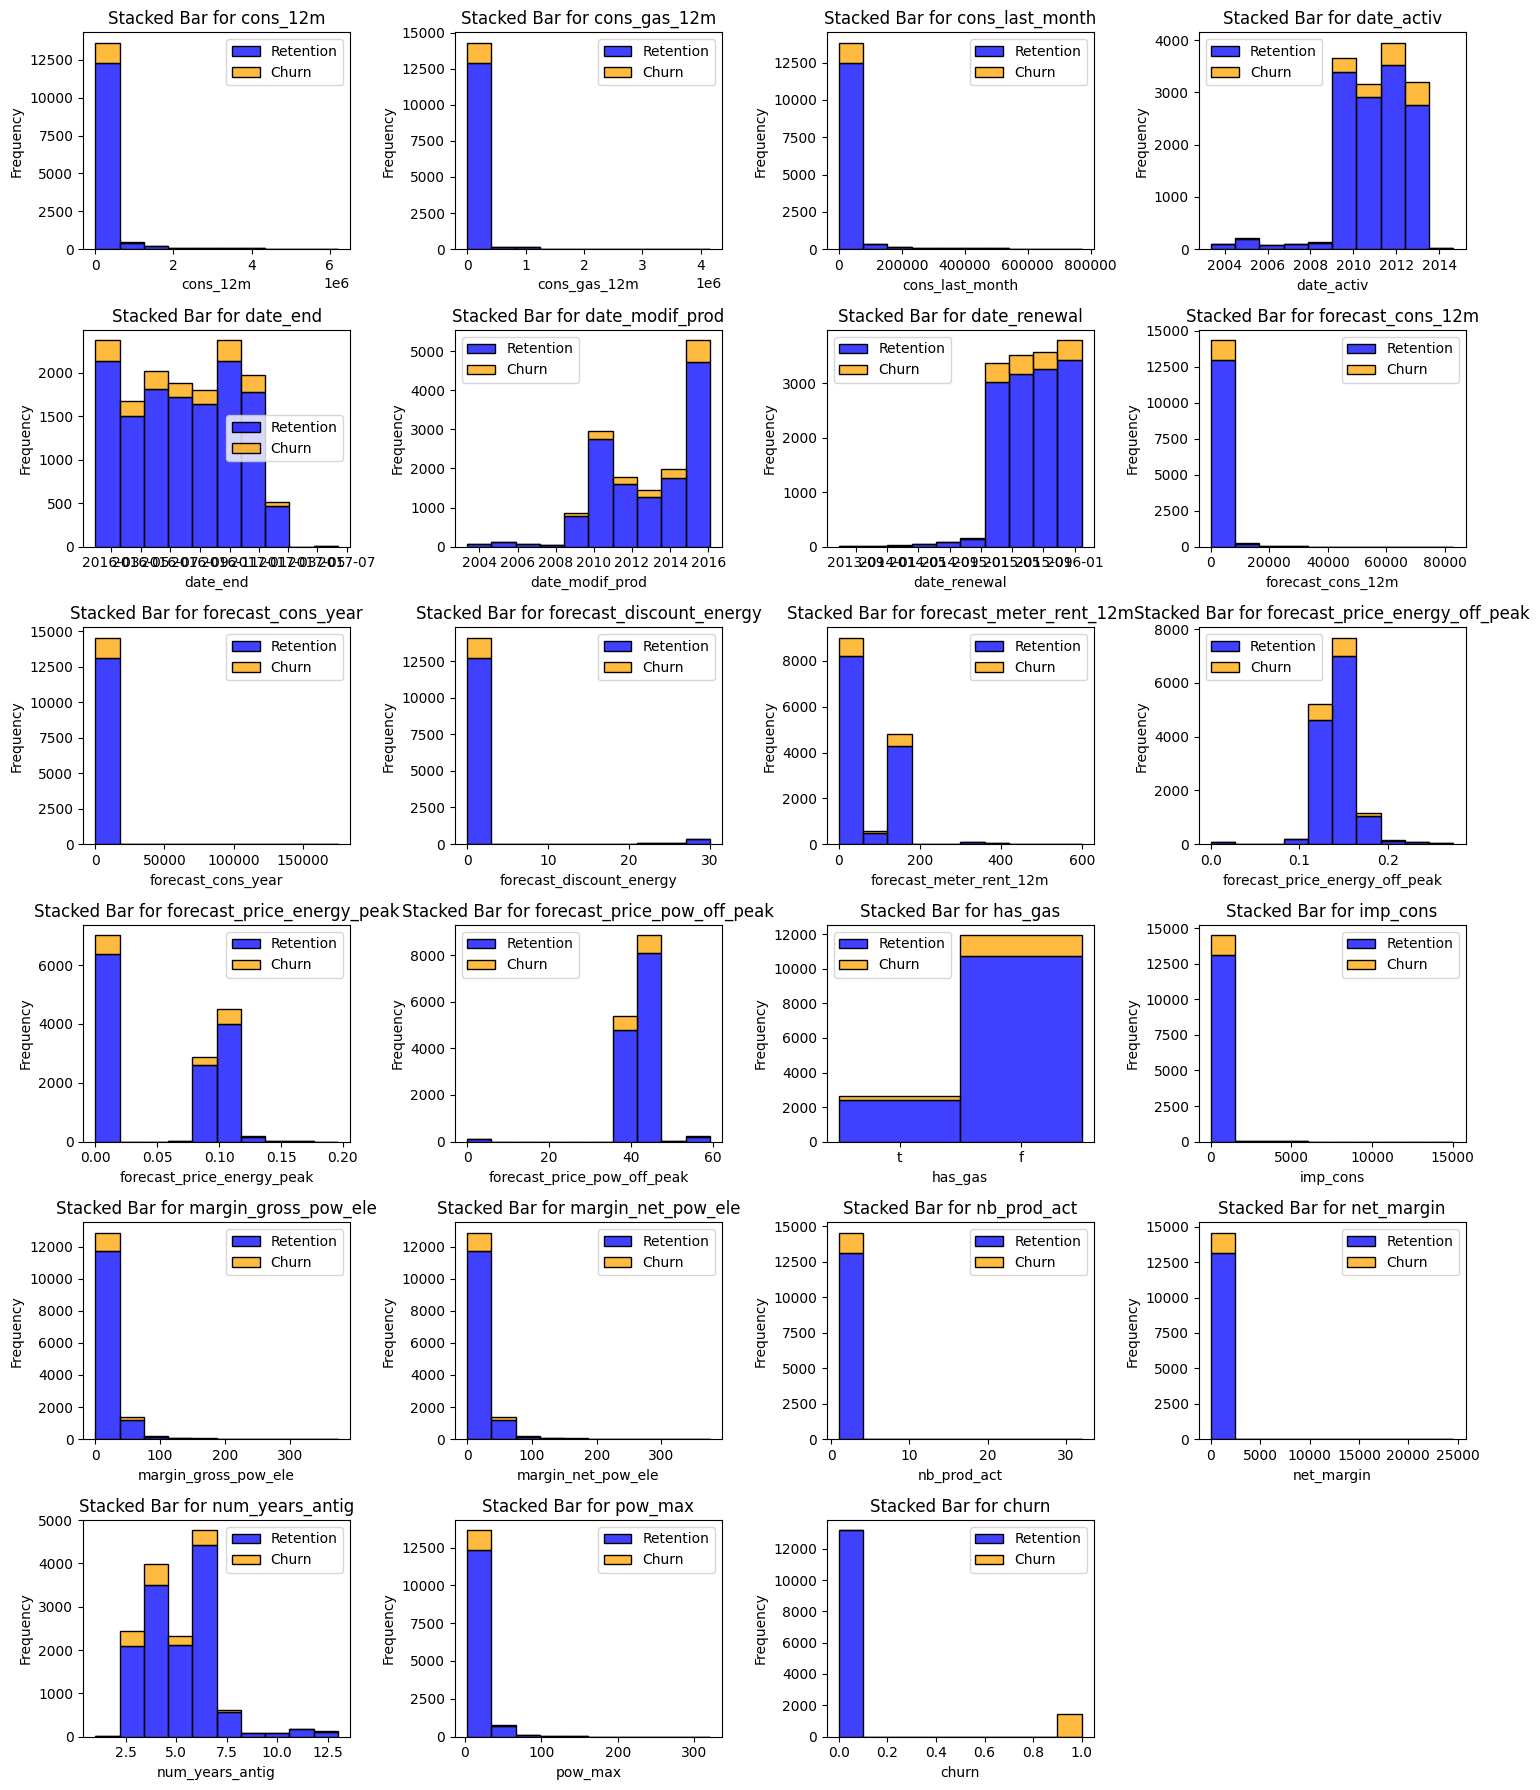

In [77]:
plt.figure(figsize=(15, 18))
for i, feature in enumerate(X.columns[:-1]):  # Exclude the 'Churn' column
    plt.subplot(6, 4, i + 1)
    
    # Create a custom palette to reverse the default colors
    custom_palette = {0: 'blue', 1: 'orange'}
    sns.histplot(data=X, x=feature, hue='churn', multiple= 'stack', bins=10, hue_order=[1, 0], palette= custom_palette)
    
    plt.title(f'Stacked Bar for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend( labels=['Retention', 'Churn'])
    
plt.tight_layout()
plt.show()

### observations
- churn is more prominent in lower comsumption ranges.This suggests that customers with lower energy usage are more likely to churn.

In [78]:
client_df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ',
       'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn', 'gas_status'],
      dtype='object')

### forecast

In [79]:
forecast = client_df[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]


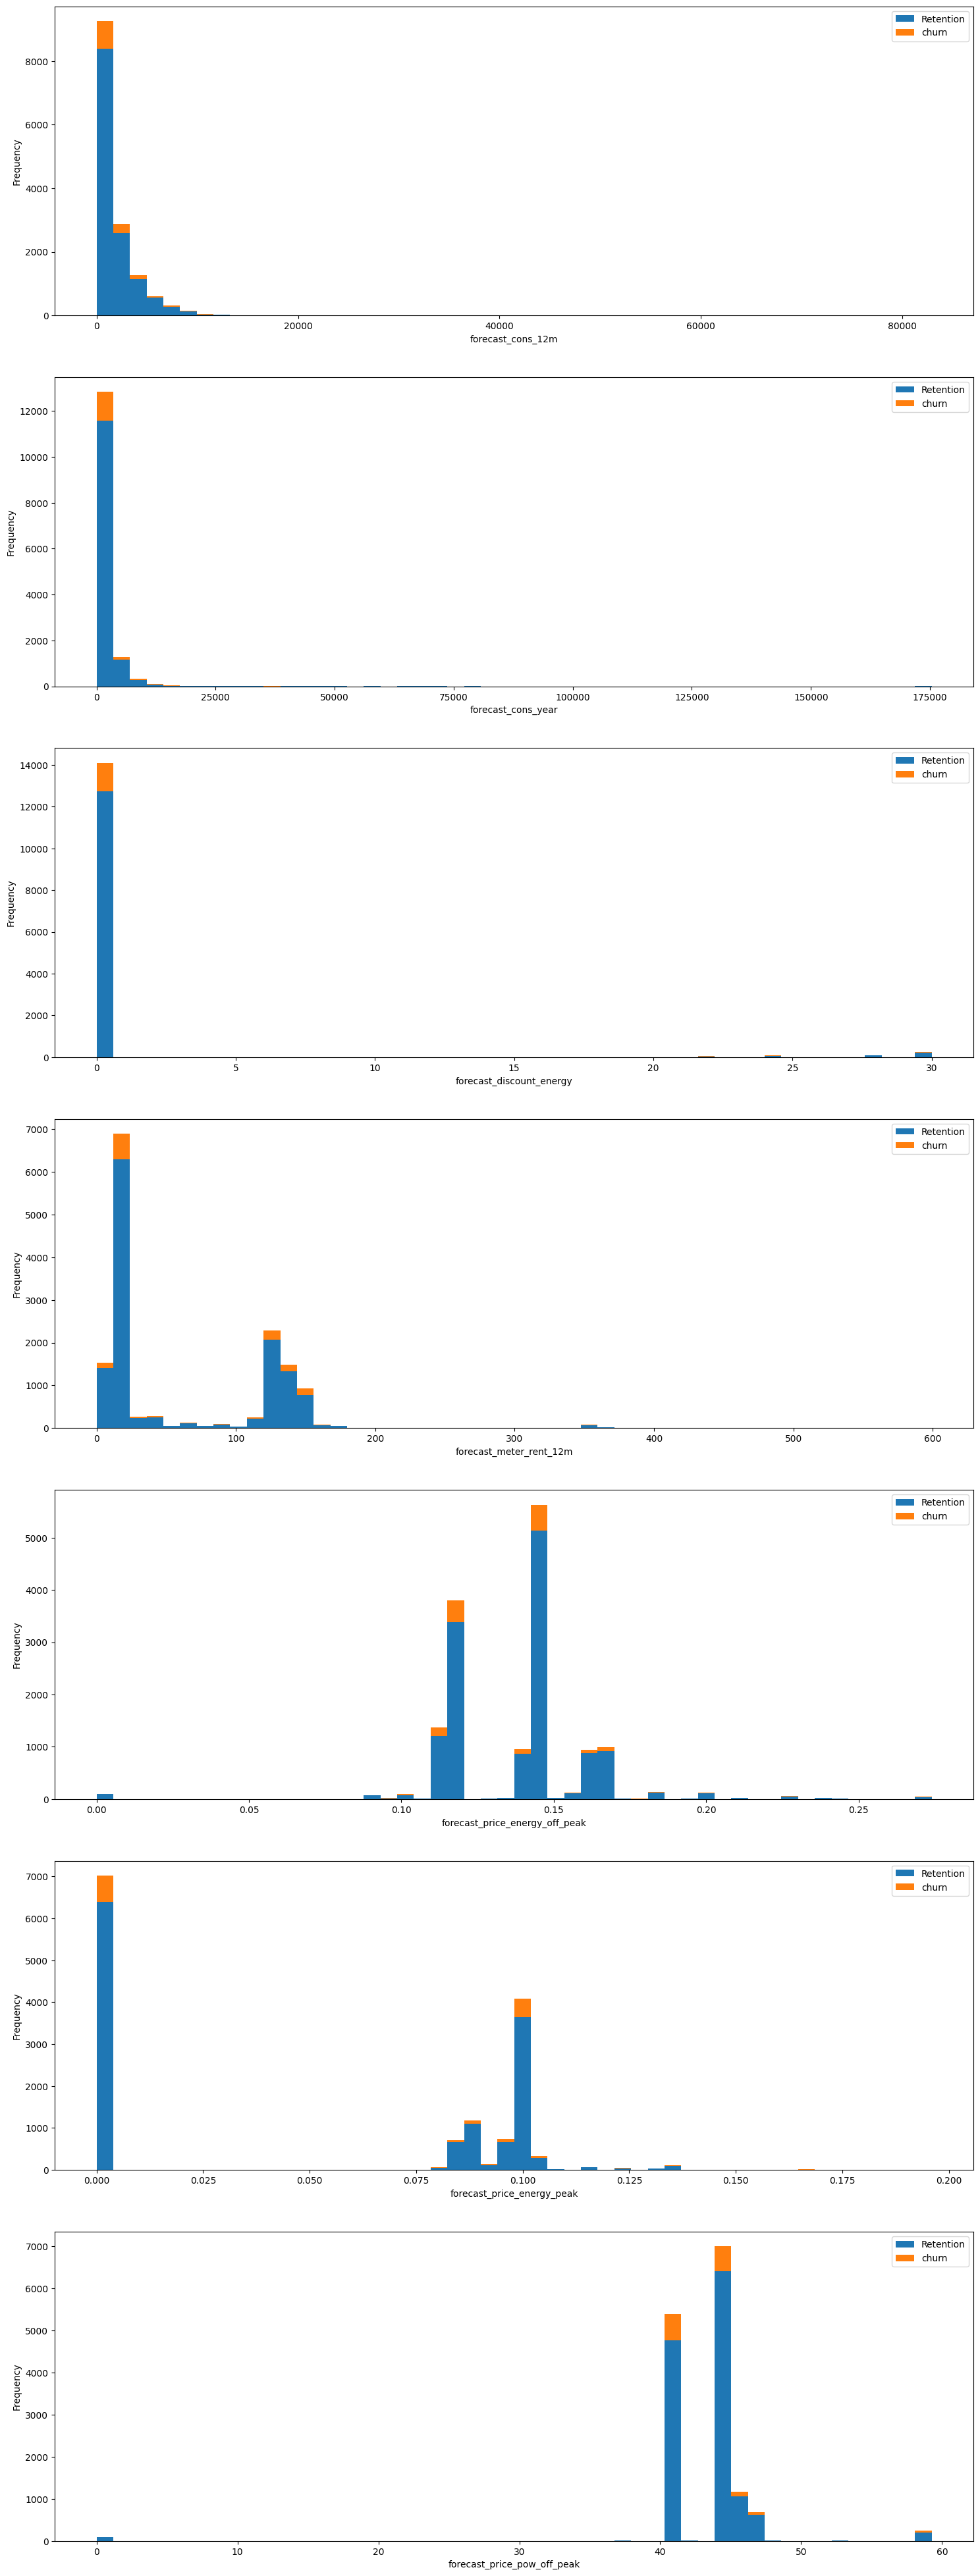

In [80]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
for i in range(7):
    plot_distribution(client_df,forecast.columns[i],axs[i])

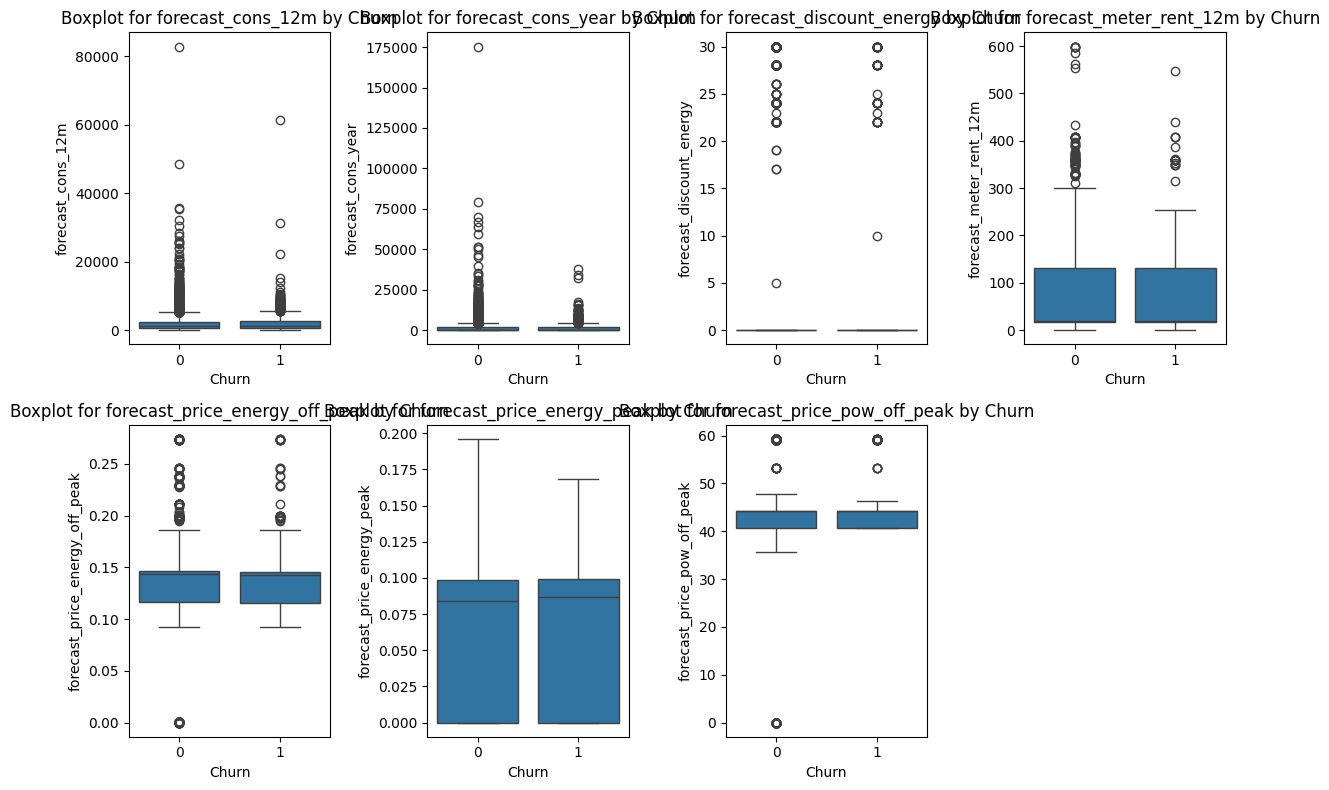

In [81]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(forecast.columns):
    plt.subplot(2, 4, i + 1)
    
    sns.boxplot(data=forecast, x=client_df['churn'], y=column)
    
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
    
plt.tight_layout()
plt.show()

- Forecasted consumption does not strongly differentiate churners.

- Discounts on energy are rare and do not indicate churn likelihood.

- Meter rent and energy pricing have similar distributions for both groups.

- Additional features may be needed for stronger churn prediction insights.

## Contract

Text(0.5, 1.0, 'Contract Type')

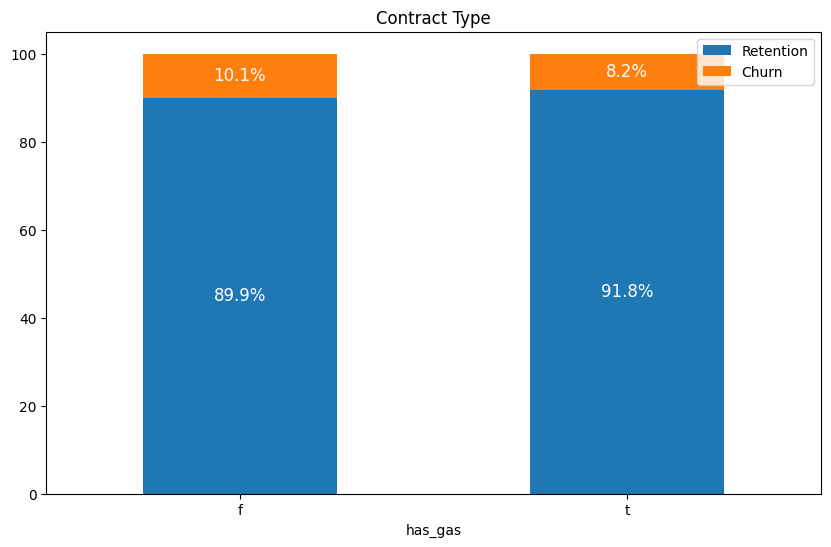

In [82]:
contract_type = client_df[["id","has_gas","churn"]]
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
ax=contract_percentage.plot(kind='bar',stacked=True,figsize=(10,6),rot=0)
# annotate_stacked_bars(ax, textsize=12)
for c in ax.containers:  # Loop through the bars
    ax.bar_label(c, fmt='%.1f%%', label_type='center', fontsize=12, color='white')
plt.legend(['Retention','Churn'],loc="upper right")
plt.title("Contract Type")

## margins


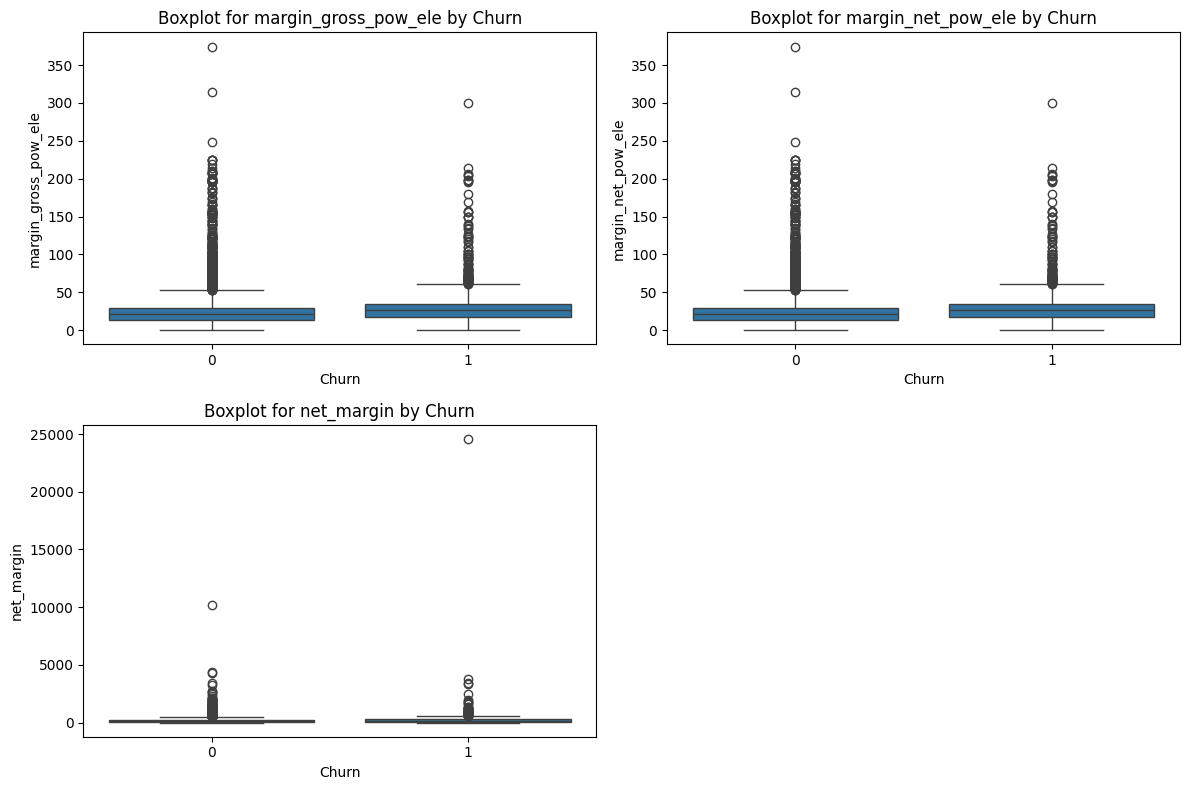

In [83]:
margin = client_df[["margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]]
plt.figure(figsize=(12, 8))
for i, column in enumerate(margin.columns):
    plt.subplot(2, 2, i + 1)
    
    sns.boxplot(data=margin, x=client_df['churn'], y=column)
    
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
    
plt.tight_layout()
plt.show()

Now lets look into price data.

In [84]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [85]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [86]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [87]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"])

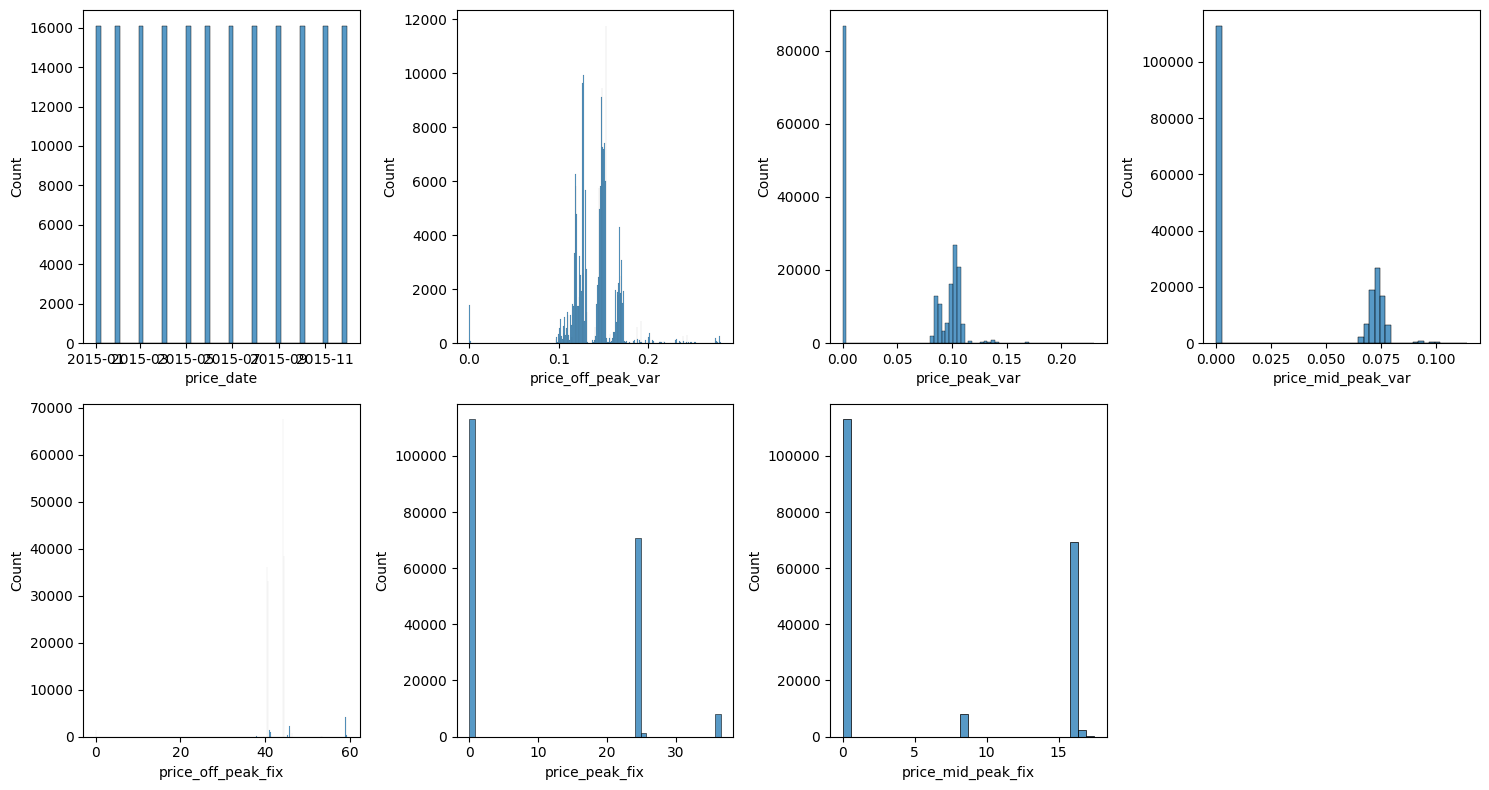

In [88]:
X = price_df.drop('id', axis=1)
y = price_df['id']
plt.figure(figsize=(15, 8))
for i in range(7):
    plt.subplot(2, 4, i + 1)
    sns.histplot(X.iloc[:, i])
plt.tight_layout()
plt.show()

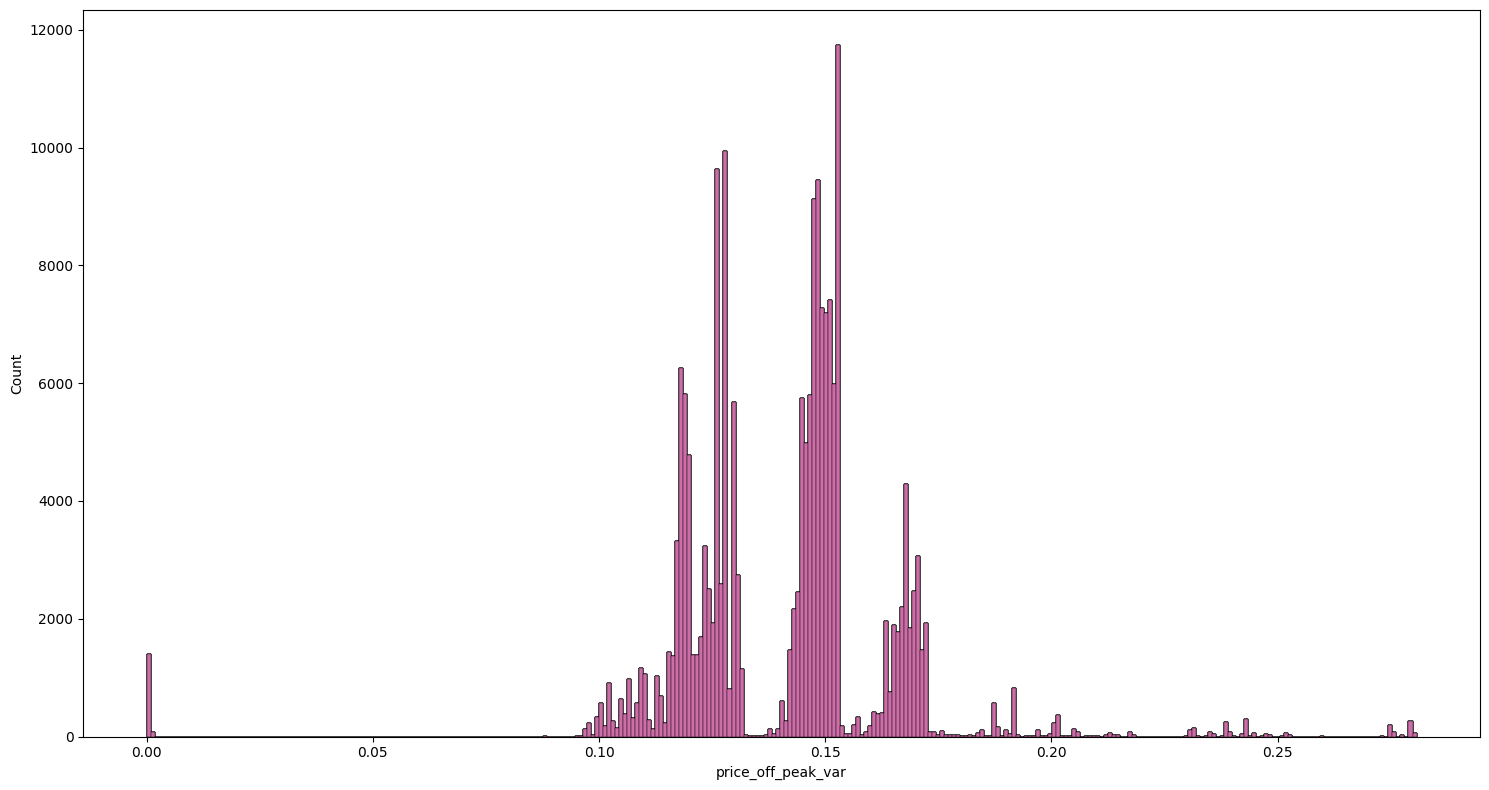

In [89]:
plt.figure(figsize=(15, 8))
for i in range(7):
    sns.histplot(X['price_off_peak_var'])
plt.tight_layout()
plt.show()

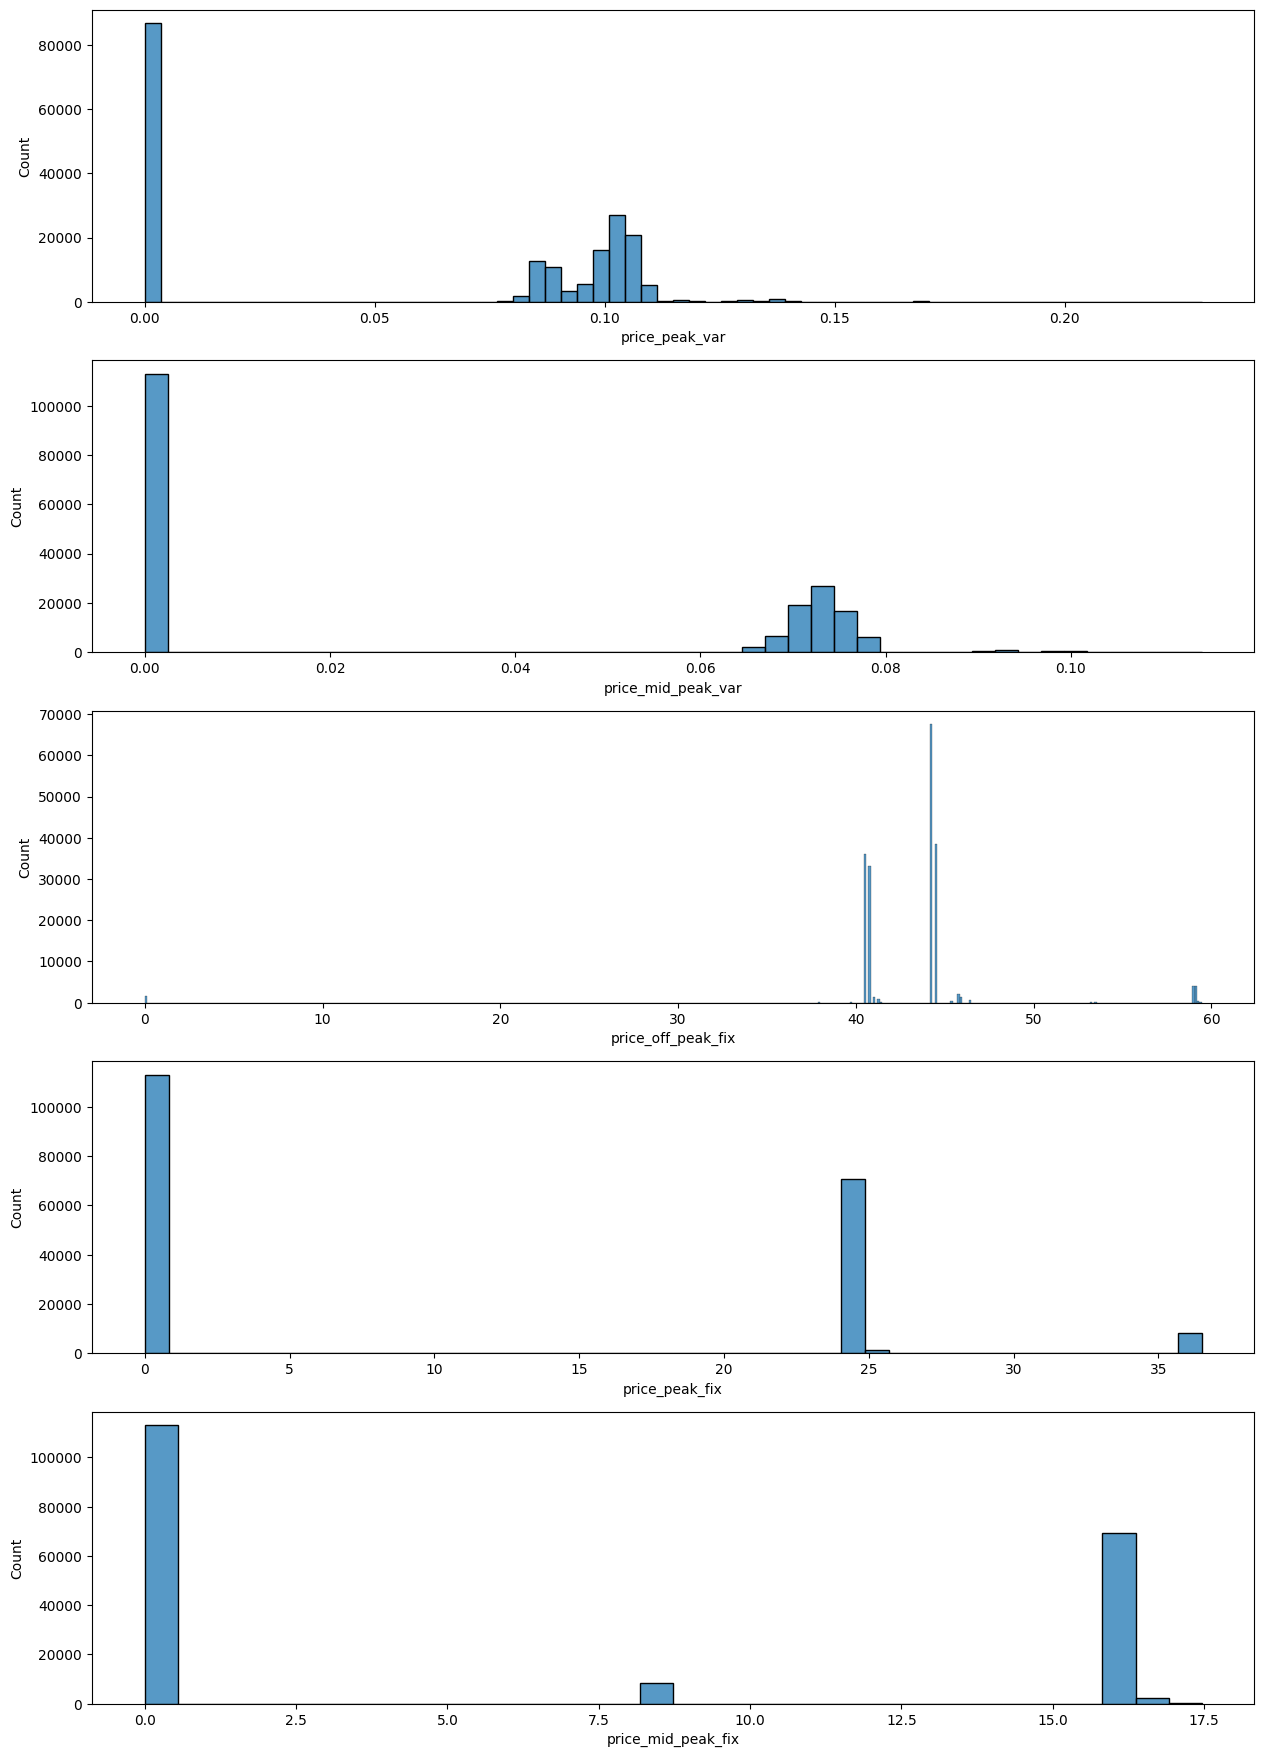

In [90]:

plt.figure(figsize=(15, 22))
selected_columns= ['price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
# Iterate through the selected columns and create histplots
for i, column in enumerate(selected_columns):
    plt.subplot(len(selected_columns), 1, i + 1)
    sns.histplot(price_df[column])
    plt.show

In [91]:
merged_df = pd.merge(client_df, price_df, on="id", how = "outer")

In [92]:
pd.set_option('display.max_columns', None)

In [93]:

merged_df.head(2)


,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,gas_status,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,22034.0,0.0,3084.0,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425.0,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1.0,81.42,6.0,17.25,0.0,0.0,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
1,0002203ffbb812588b632b9e628cc38d,22034.0,0.0,3084.0,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425.0,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1.0,81.42,6.0,17.25,0.0,0.0,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389


In [94]:
merged_df.shape

(193002, 32)

In [95]:

merged_df.duplicated().sum()

0

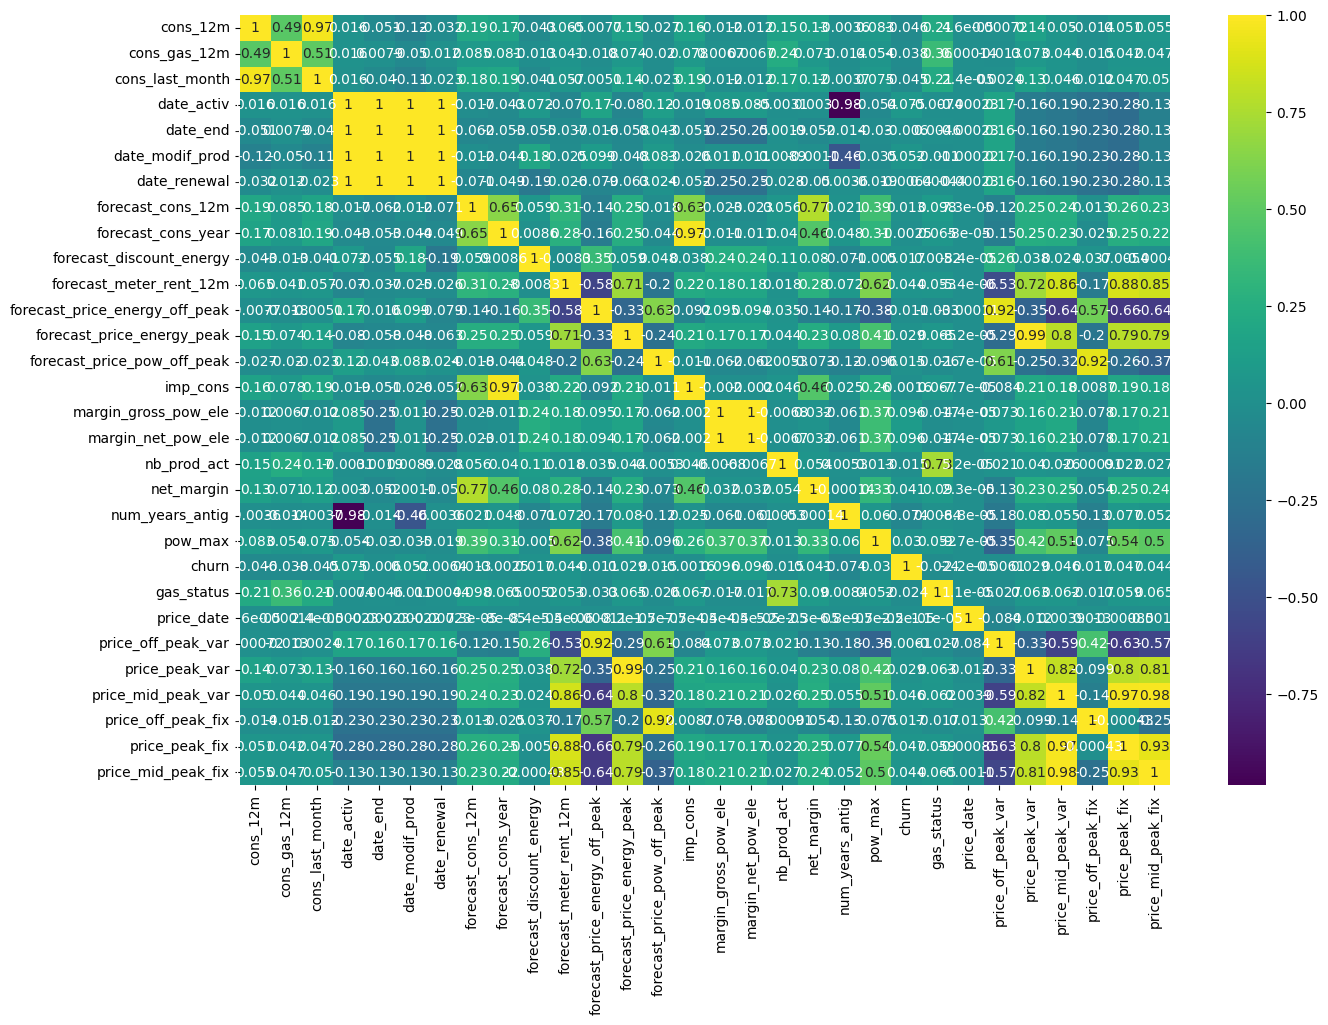

In [96]:

plt.figure(figsize=(15,10))
sns.heatmap(merged_df.drop(['id','has_gas'],axis = 1).corr(), cmap='viridis',annot = True)
plt.show()

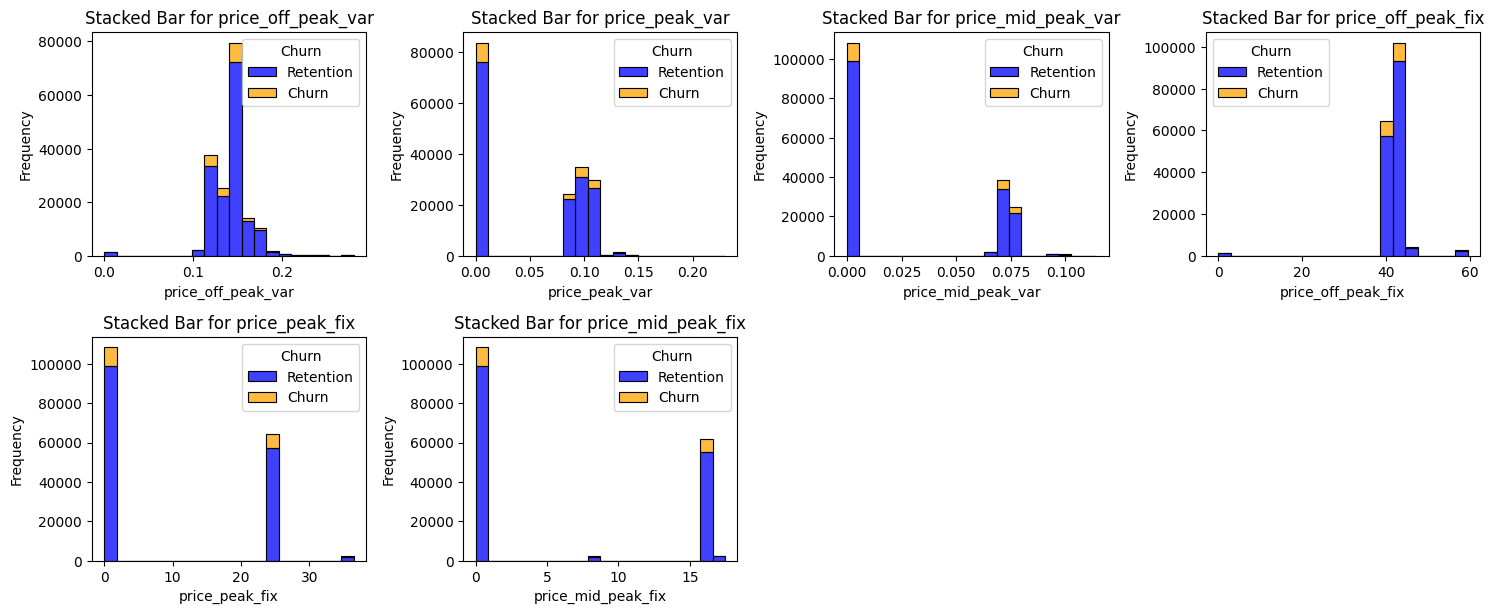

In [97]:
plt.figure(figsize=(15, 18))
for i, feature in enumerate(merged_df.columns[-6:]):  # Exclude the 'Churn' column
    plt.subplot(6, 4, i + 1)
    
    # Create a custom palette to reverse the default colors
    custom_palette = {0: 'blue', 1: 'orange'}
    sns.histplot(data=merged_df, x=feature, hue='churn', multiple= 'stack', bins=20, hue_order=[1, 0], palette= custom_palette)
    
    plt.title(f'Stacked Bar for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Churn', labels=['Retention', 'Churn'])
    
plt.tight_layout()
plt.show()

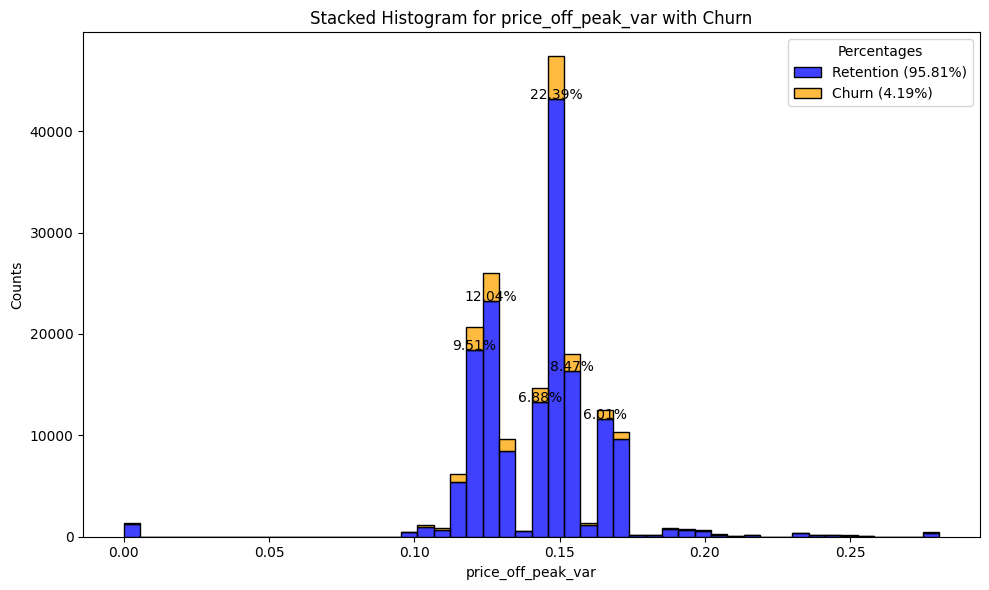

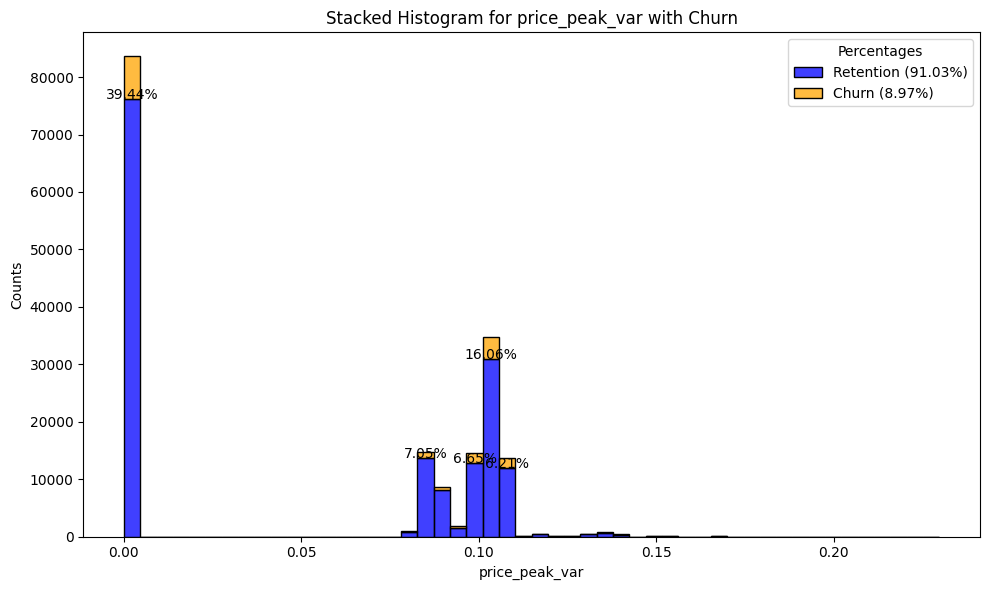

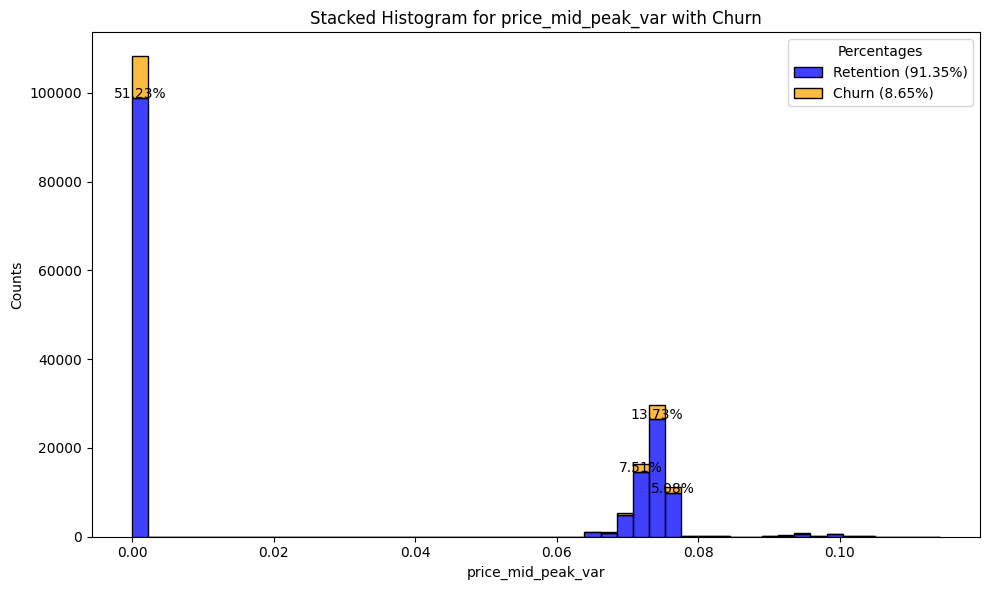

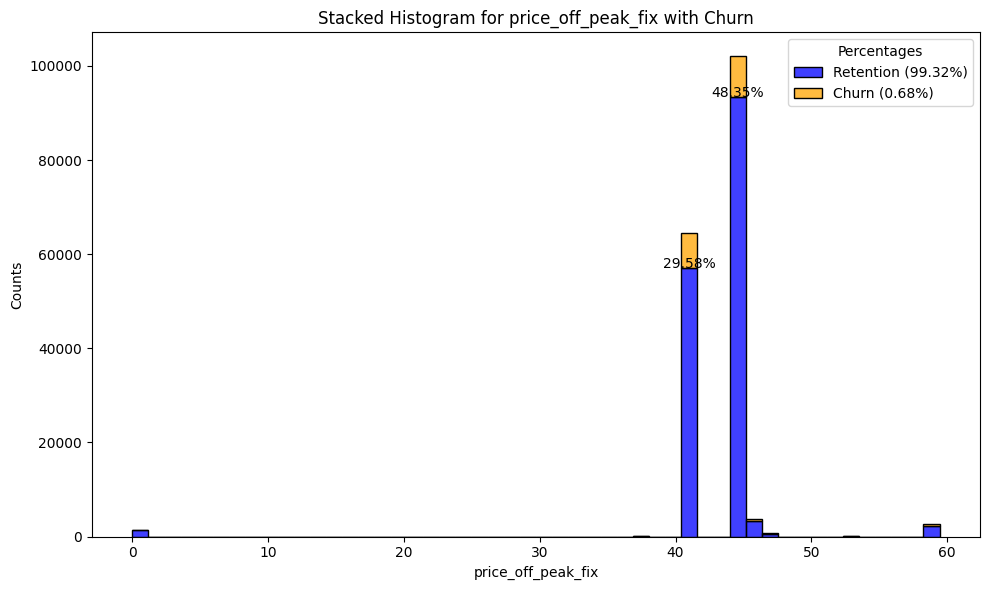

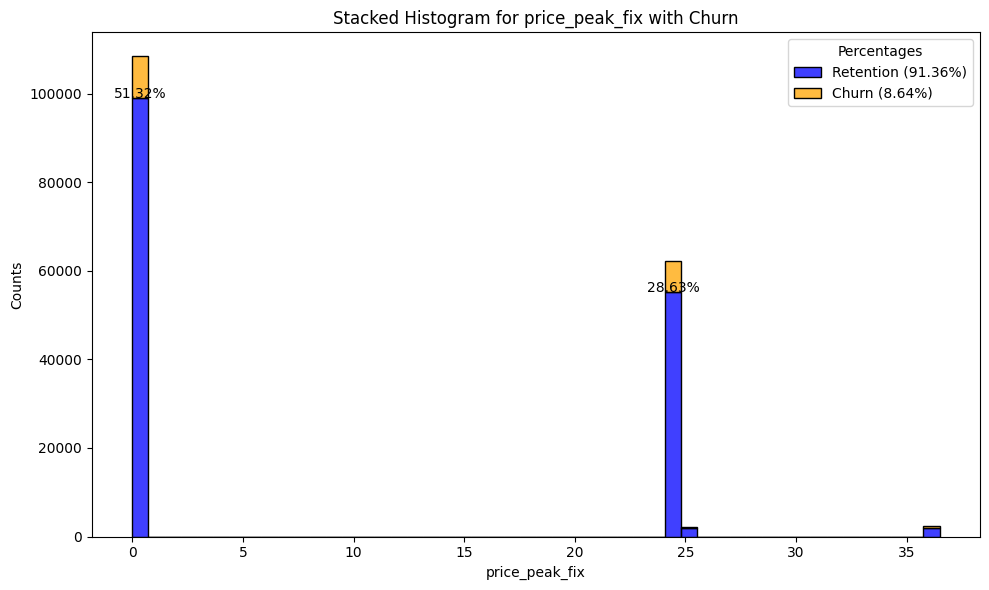

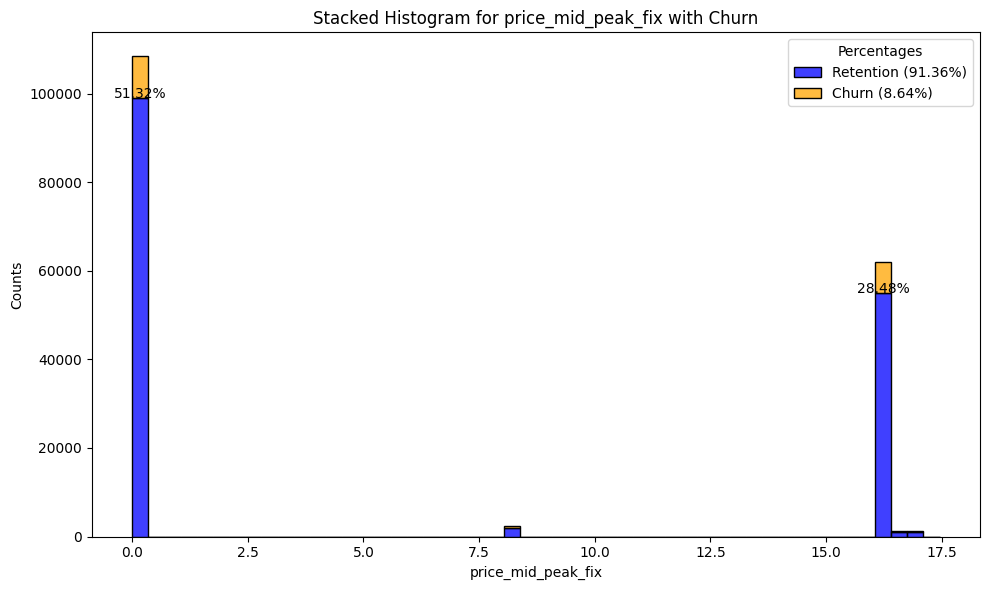

In [98]:
# Select the last 6 columns and add "churn" to the end
selected_columns = merged_df.columns[-6:].tolist()
selected_columns.append('churn')

# Create a new DataFrame with only the selected columns
subset_df = merged_df[selected_columns]

# Calculate total percentages of retention and churn
total_count = len(subset_df)
total_retention = (subset_df['churn'] == 0).sum()
total_churn = (subset_df['churn'] == 1).sum()

# Create a stacked bar chart for each column
for column in subset_df.columns[:-1]:  # Exclude the "churn" column
    plt.figure(figsize=(10, 6))  # Set the figure size before each plot
    custom_palette = {0: 'blue', 1: 'orange'}  # Set the color palette
    ax = sns.histplot(data=subset_df, x=column, hue='churn', multiple='stack', hue_order=[1, 0], bins=50, palette=custom_palette)

    plt.title(f'Stacked Histogram for {column} with Churn')
    plt.xlabel(column)
    plt.ylabel('Counts')

    # Calculate and display percentages for churn and retention
    for p in ax.patches:
        height = p.get_height()
        percentage = height / total_count
        if percentage > 0.05:  # Annotate only if percentage is greater than 0.0%
            if p.get_facecolor() == custom_palette[0]:  # Check if the color is blue (Retention)
                ax.annotate(f'Retention: {percentage:.2%}', (p.get_x() + p.get_width() / 2., height / 2),
                            ha='center', va='baseline', fontsize=10, color='black')
            else:  
                if percentage > 0.05:
                        # Color is orange (Churn)
                    ax.annotate(f'{percentage:.2%}', (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='baseline', fontsize=10, color='black')

    # Calculate percentages specific to the variable being plotted
    variable_retention = (subset_df.loc[subset_df[column] == 0, 'churn'] == 0).sum()
    variable_churn = (subset_df.loc[subset_df[column] == 0, 'churn'] == 1).sum()
    variable_total = variable_retention + variable_churn

    variable_retention_percentage = variable_retention / variable_total
    variable_churn_percentage = variable_churn / variable_total

    # Add the percentages specific to the variable to the legend
    legend_labels = [f'Retention ({variable_retention_percentage:.2%})', f'Churn ({variable_churn_percentage:.2%})']
    plt.legend(title='Percentages', labels=legend_labels, loc='upper right')
    
    plt.tight_layout()
    plt.show()

#### Observations
price_off_peak_var and price_off_peak_fix seem to have the least percentage effects of Churn. Remaining variables price_off_peak_fix, price_mid_peak_var, price_mid_peak_fix have high churn percentages.

price_off_peak_var =  4.19 (low)

price_peak_var = 8.97 (highest)
price_mid_peak_var = 8.65 (high)
price_off_peak_fix= 0.68 (least)

price_peak_fix= 8.64 (high)
price_mid_peak_fix = 8.64 (high)

In [99]:
average_prices = price_columns =merged_df[['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']].mean()

# Print the average prices
print(average_prices)

price_off_peak_var     0.141027
price_peak_var         0.054630
price_mid_peak_var     0.030496
price_off_peak_fix    43.334477
price_peak_fix        10.622875
price_mid_peak_fix     6.409984
dtype: float64


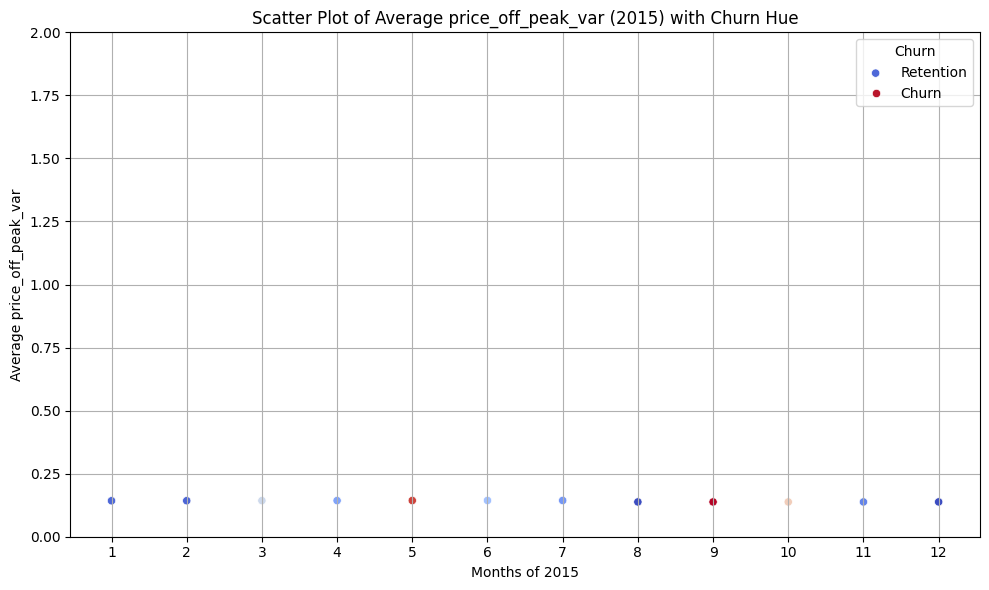

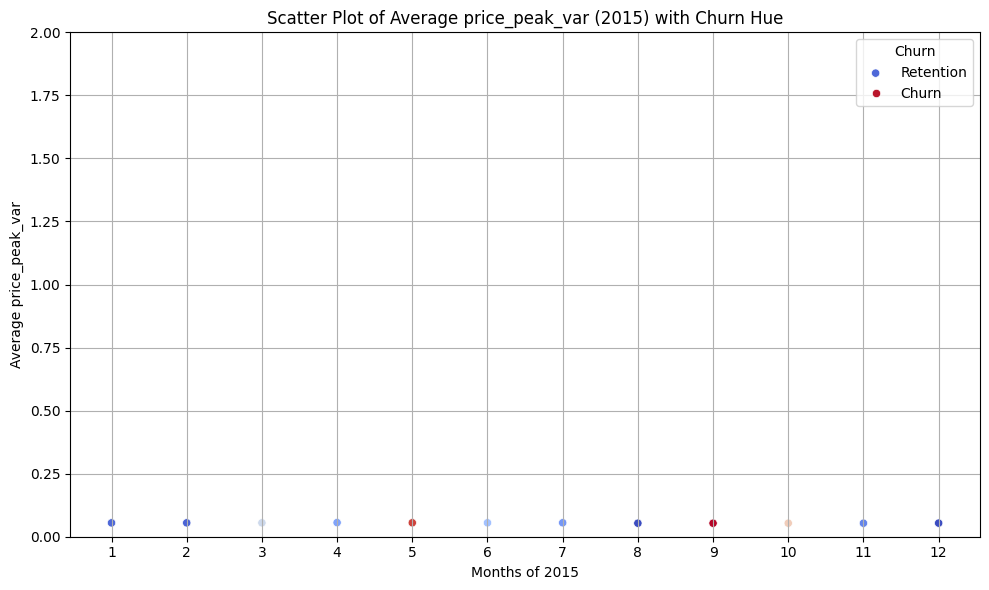

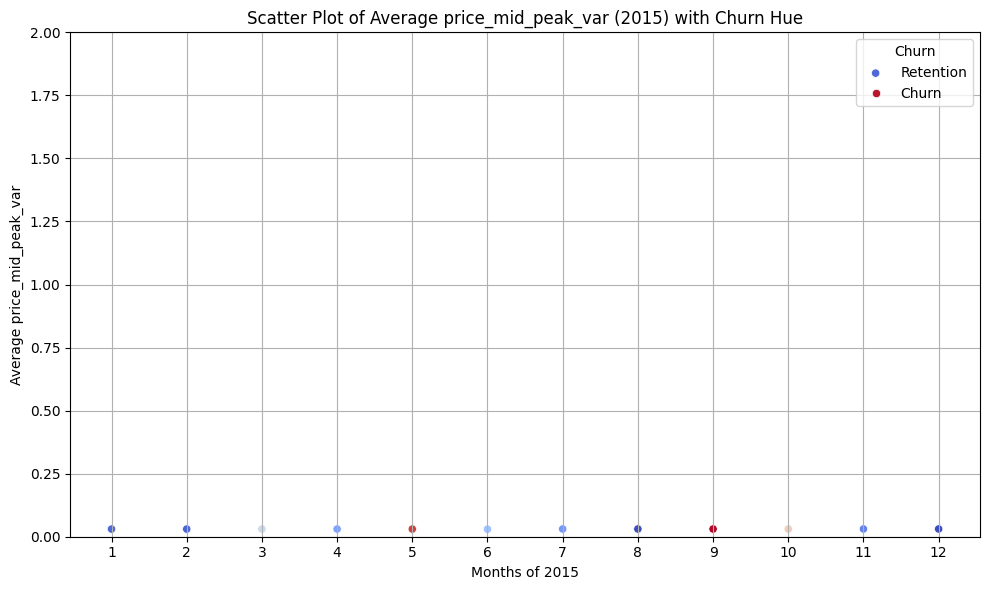

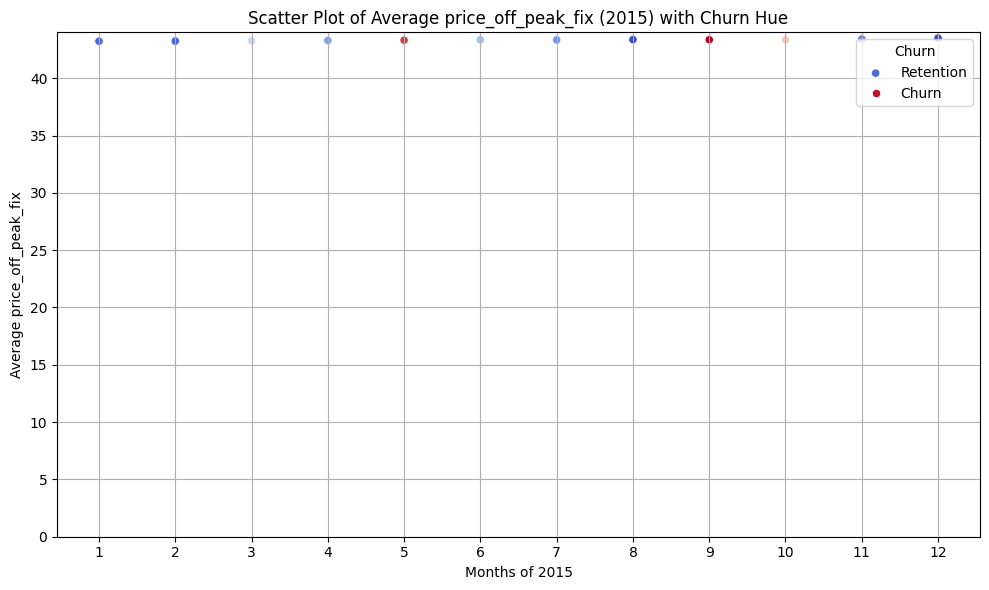

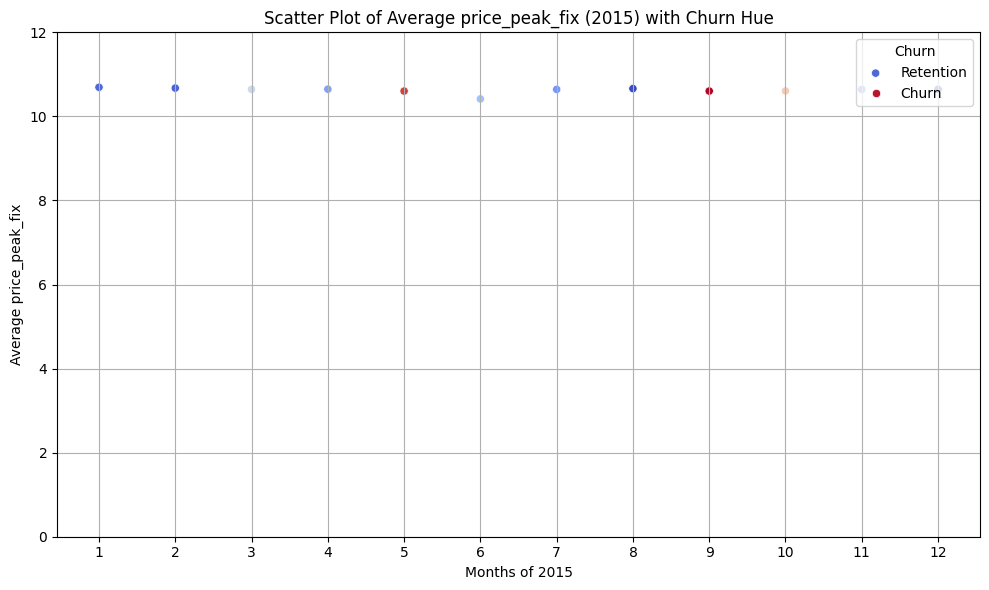

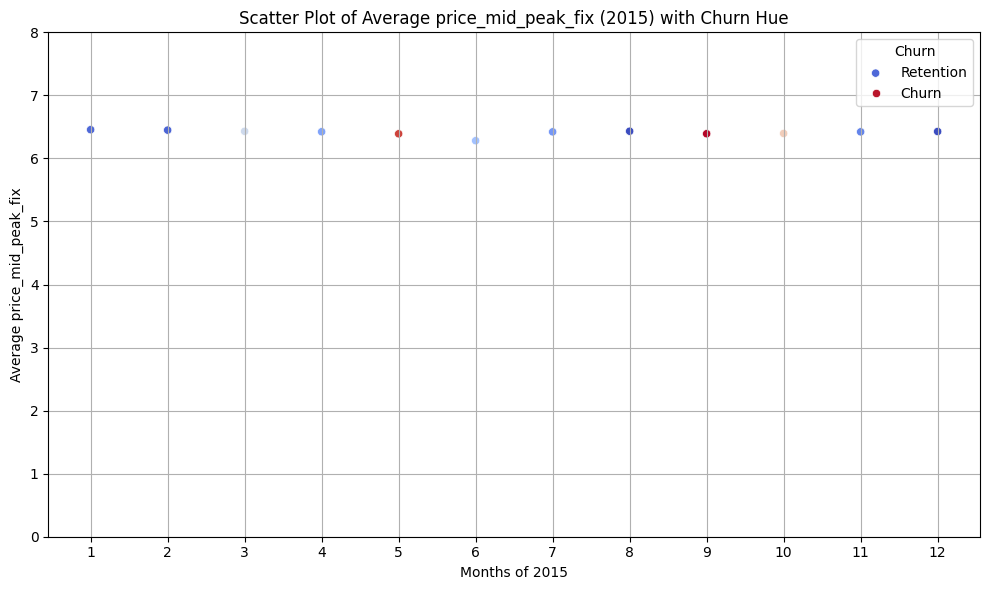

In [100]:
last_six_columns = merged_df.columns[-6:]

custom_palette = {0: 'blue', 1: 'orange'}
# Loop through the last 6 columns and create scatter plots with 'churn' as hue
for column in last_six_columns:
    # Group the data by month and calculate the average for the current column and 'churn'
    monthly_avg = merged_df.groupby(merged_df['price_date'].dt.month)[[column,'churn']].mean()
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.scatterplot(data=monthly_avg, x=monthly_avg.index,y=column, palette='coolwarm_r',hue_order=[1,0],hue='churn',marker='o')   
    # Customize the plot
    plt.xlabel('Months of 2015')
    plt.ylabel(f'Average {column}')
    plt.title(f'Scatter Plot of Average {column} (2015) with Churn Hue')
    plt.grid(True)
    plt.legend(title='Churn',loc='upper right', labels=['Retention', 'Churn'])
    # Set the y-axis limits to start from zero with a scale of 2
    plt.ylim(0, np.ceil(monthly_avg[column].max() / 2) * 2)
    plt.xticks(np.arange(1, 13))
    # Show the plot
    plt.tight_layout()
    plt.show()

In [101]:

# Get the last 6 columns of the DataFrame
last_six_columns = merged_df.columns[-6:]

# Loop through the last 6 columns and calculate the average price offered for both 'Churn' (0) and 'Retention' (1) grouped by months
for column in last_six_columns:
    # Group the data by month and calculate the average for the current column and 'churn'
    monthly_avg = merged_df.groupby([merged_df['price_date'].dt.month, 'churn'])[column].mean().unstack()
    
    # Print the average price offered for 'Churn' (0) and 'Retention' (1) grouped by months
    print(f'Column: {column}')
    print(monthly_avg)
    print()


Column: price_off_peak_var
churn            0.0       1.0
price_date                    
1           0.144004  0.143417
2           0.144204  0.143662
3           0.144420  0.143756
4           0.144519  0.144158
5           0.144756  0.144689
6           0.144936  0.145024
7           0.144959  0.144834
8           0.139324  0.138646
9           0.139327  0.138854
10          0.139316  0.138384
11          0.139335  0.138556
12          0.139433  0.138810

Column: price_peak_var
churn            0.0       1.0
price_date                    
1           0.051809  0.056989
2           0.051916  0.056931
3           0.051981  0.057281
4           0.052942  0.058077
5           0.052141  0.057344
6           0.052145  0.057149
7           0.052299  0.057206
8           0.050633  0.055488
9           0.050597  0.055395
10          0.050772  0.055438
11          0.050689  0.055407
12          0.050982  0.055948

Column: price_mid_peak_var
churn            0.0       1.0
price_date            

As we can see from the series, the average price offered to customers who churned in price_peak_var is 0.054 points higher than the price offered to customers who have not churned.
There is a slight price rise which might be the reason why customers have churned.

This is also true for price_mid_peak_var where the prices offered to retained customers has a difference of 0.302. And also for pice_peak_fix (difference of 2) and price_mid_peak_fix(1.35).
We can also verify this, after comparing to prices in during offpeak for both electricity and energy, yes, the given average price seem too high for off peak, however, customers have churned on those rates too.

Therefore, we can to an extent think, that price sensitiviity exists. There is a slight variation in prices, and prices offered to customers could be leading to more churn than retention. Simply seeing the price rates during peak and off peak periods gives the impression that customers have been charged low, or given reasonable rates. However, the real picture speaks when we examine deeper and check the actual rates offered to customers who have churned.

In [102]:
merged_data = merged_df.to_csv('merged_data.csv')